In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import warnings
warnings.filterwarnings("ignore")

##  Importing libraries and data

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/rajtilakls2510/car_price_predictor/master/quikr_car.csv")

In [3]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


### Checking the count of null values across the columns

In [4]:
df.isna().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

In [5]:
df.columns

Index(['name', 'company', 'year', 'Price', 'kms_driven', 'fuel_type'], dtype='object')

### Dropping duplicates if exists

In [6]:
df=df.drop_duplicates()

### Checking value counts of all the columns

In [7]:
 for i in df.columns:
    print(df[i].value_counts())
    print('-'*50)

Honda City                                 11
Maruti Suzuki Dzire                         9
Maruti Suzuki Alto 800 Lxi                  9
Maruti Suzuki Swift Dzire VXi 1.2 BS IV     7
Maruti Suzuki Wagon R                       5
                                           ..
Mahindra TUV300 T8                          1
Honda Brio V MT                             1
Renault Duster 85 PS RxL Explore LE         1
Hyundai i20 Magna O 1.2                     1
Chevrolet Sail 1.2 LT ABS                   1
Name: name, Length: 525, dtype: int64
--------------------------------------------------
Maruti        216
Hyundai       135
Mahindra       80
Tata           70
Honda          52
Toyota         37
Chevrolet      34
Ford           27
Renault        27
Volkswagen     18
Skoda          10
Audi           10
BMW             8
Datsun          7
Nissan          6
Mercedes        6
Mitsubishi      5
Commercial      5
tata            3
Hindustan       3
Fiat            3
Mini            3
MARUTI   

In [8]:
df['Price'].value_counts()

Ask For Price    33
2,50,000         14
3,50,000         13
1,30,000         12
4,00,000         11
                 ..
7,70,000          1
3,35,000          1
6,35,000          1
65,000            1
5,00,001          1
Name: Price, Length: 274, dtype: int64

In [9]:
dfnew= df.drop(index =df.index[df['Price']=='Ask For Price'])

### Bar plot for visualizing the number of companies and their frequency

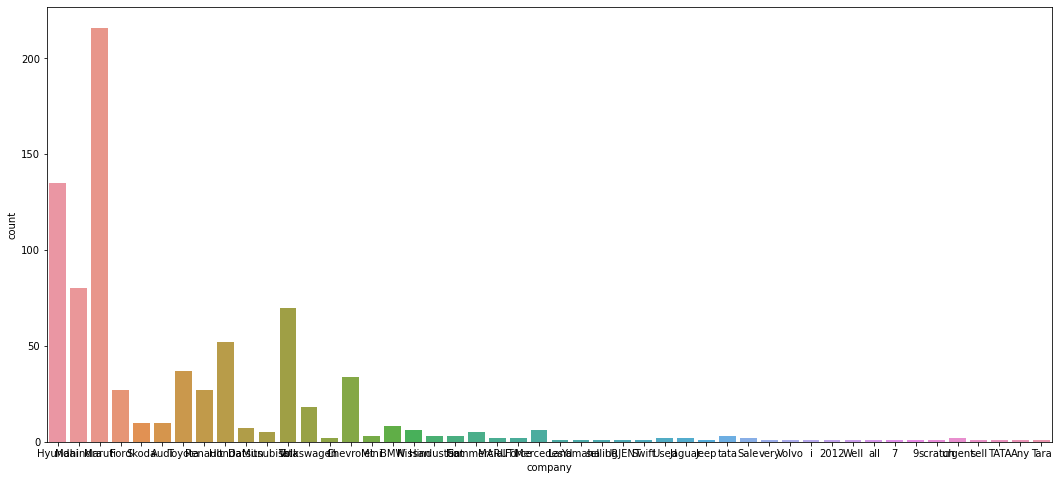

In [10]:
plt.figure(figsize=(18,8))
sns.countplot('company',data=df)
plt.show()

### As we can see there is so much inconsistency with the company column and it needs to be cleaned

### Bar plot for visualizing the various years and their frequency

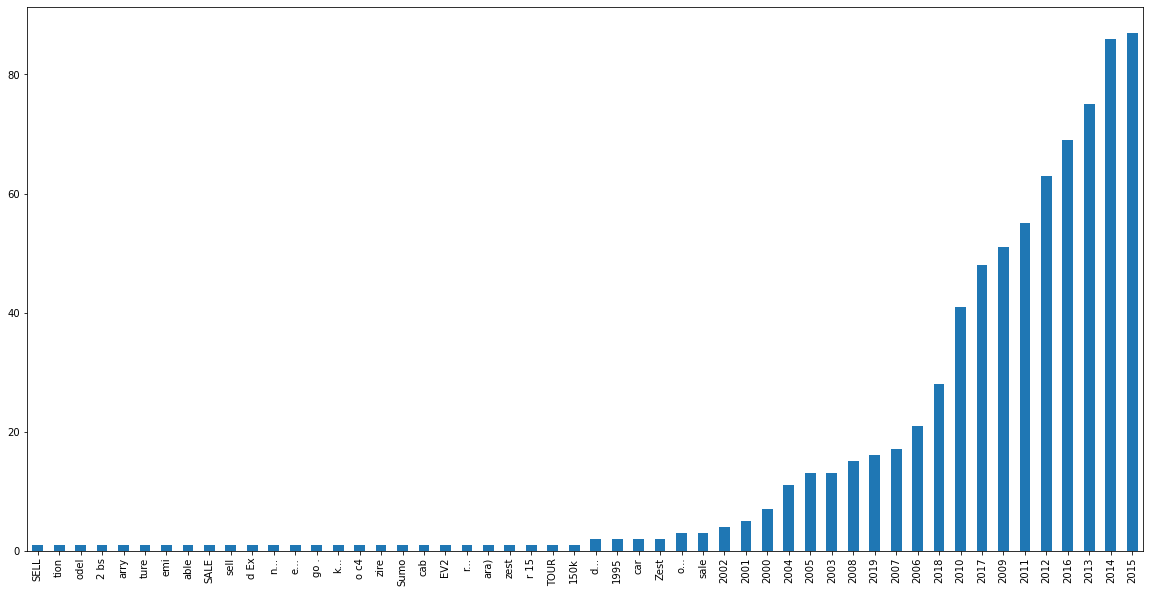

In [11]:
plt.figure(figsize=(20,10))
dfnew['year'].value_counts(ascending=True).plot(kind='bar')
plt.show()

### Too many non numeric entries in the year column , so we will remove them

In [12]:
dfnew=dfnew[dfnew['year'].str.isnumeric()]

### Bar plot for visualizing the various years and their frequency

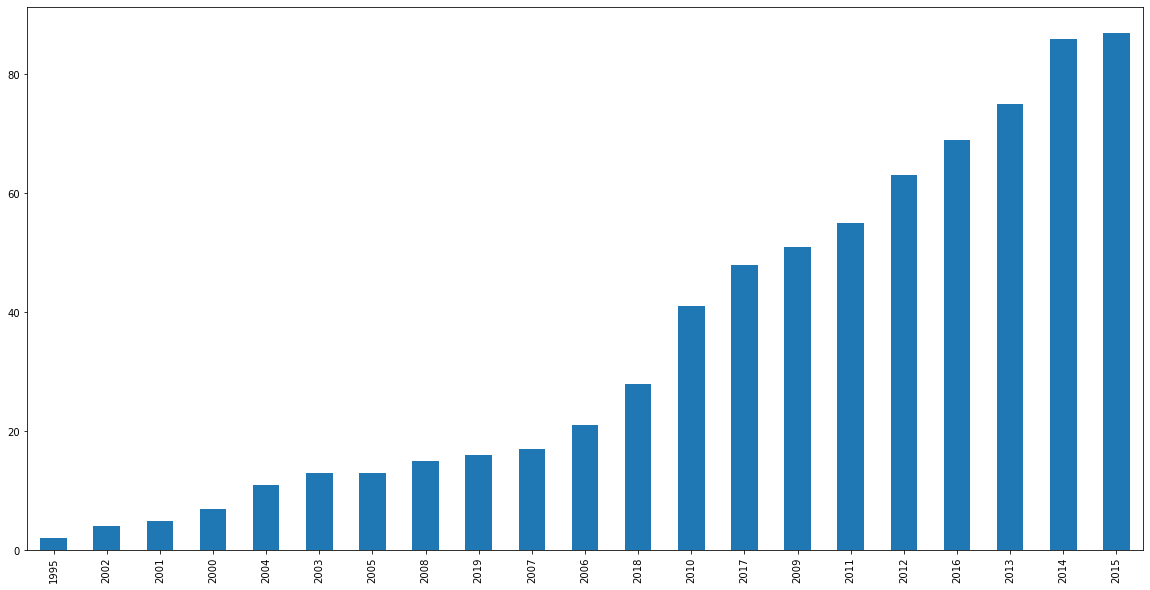

In [13]:
plt.figure(figsize=(20,10))
dfnew['year'].value_counts(ascending=True).plot(kind='bar')
plt.show()

In [14]:
# Now the year column looks tidy

###  Removing invalid entries from the kms_driven column

In [15]:
dfnew['kms_driven'][dfnew['kms_driven']=='Petrol']

890    Petrol
891    Petrol
Name: kms_driven, dtype: object

In [16]:
dfnew=dfnew.drop(index=[890,891])

In [17]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 725 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        725 non-null    object
 1   company     725 non-null    object
 2   year        725 non-null    object
 3   Price       725 non-null    object
 4   kms_driven  725 non-null    object
 5   fuel_type   724 non-null    object
dtypes: object(6)
memory usage: 39.6+ KB


In [18]:
dfnew.isnull().sum()

name          0
company       0
year          0
Price         0
kms_driven    0
fuel_type     1
dtype: int64

In [19]:
dfnew['name'].nunique()

463

In [20]:
dfnew['company'].value_counts()

Maruti        202
Hyundai       129
Mahindra       78
Tata           61
Honda          51
Toyota         35
Chevrolet      33
Ford           26
Renault        26
Volkswagen     17
Audi           10
Skoda          10
BMW             8
Datsun          6
Nissan          6
Mercedes        6
Mitsubishi      5
Mini            3
Hindustan       3
Fiat            3
Force           2
Jaguar          2
Land            1
Jeep            1
Volvo           1
Name: company, dtype: int64

In [21]:
dfnew[dfnew['fuel_type'].isnull()]

,name,company,year,Price,kms_driven,fuel_type
132,Toyota Corolla,Toyota,2009,"2,75,000","26,000 kms",NaN


In [22]:
dfnew.iloc[132].company

'Toyota'

### As per  domain knowledge 2009 Toyota corolla petrol variant was mostly purchased , so replacing the fuel type with petrol

In [23]:
dfnew.at[132,'fuel_type']='Petrol'

#### Checking the fashion in which the names are entered

In [24]:
dfnew['name'].value_counts().head()

Honda City                                 11
Maruti Suzuki Dzire                         9
Maruti Suzuki Swift Dzire VXi 1.2 BS IV     7
Maruti Suzuki Alto 800 Lxi                  7
Renault Duster                              5
Name: name, dtype: int64

In [25]:
dfnew['name'][dfnew['name'].str.startswith('Honda')].value_counts()

Honda City                       11
Honda Amaze                       5
Honda City 1.5 S MT               4
Honda City SV                     2
Honda City 1.5 EXi New            2
Honda Amaze 1.2 S i VTEC          2
Honda City 1.5 V MT               2
Honda Amaze 1.2 VX i VTEC         1
Honda Mobilio S i DTEC            1
Honda Brio VX AT                  1
Honda City ZX GXi                 1
Honda City 1.5 V AT               1
Honda Brio V MT                   1
Honda WR V S MT Petrol            1
Honda City 1.5 E MT               1
Honda City 1.5 S Inspire          1
Honda Amaze 1.5 E i DTEC          1
Honda City 1.5 V MT Exclusive     1
Honda Jazz S MT                   1
Honda City ZX EXi                 1
Honda Mobilio                     1
Honda Accord                      1
Honda Jazz VX MT                  1
Honda City VX O MT Diesel         1
Honda City ZX VTEC                1
Honda Amaze 1.5 S i DTEC          1
Honda Brio                        1
Honda City ZX CVT           

### As company name is already available in the company column , 
### Removing the company  from the name will be ideal 
### Also the same car is entered in various formats , so standardizing them will reduce the complexity of the data 


## Helper functions

### There are two helper functions which takes the name of the car and cleanse and return the same

### These two functions are interlinked with each other , if the car name is just one worded then the output of brand_name function would be input for Clean_names function else the name needs to be cleaned manually


In [26]:
def Clean_names(Car_name):
    if re.search('\s', Car_name):
        # Extract the position of beginning of pattern
        pos = re.search('\s', Car_name).start()
        # return the cleaned name
        return Car_name[:pos]
    else:
        return Car_name  
def brand_name(Name,response='single worded'):
    Name=Name
    trim_1 = len(Name)+1
    df1=dfnew[dfnew['name'].str.startswith(Name)]
    df1['name']=df1['name'].str[trim_1:]
    print(df1['name'].value_counts())
    plt.figure(figsize=(25,8))
    df1['name'].value_counts().plot(kind="bar")
    plt.show()
    
    if response!='single worded':
        return df1
    print('Before :',len(df1['name'].value_counts()))
    df1['name']=df1['name'].apply(Clean_names)
    print('After :',len(df1['name'].value_counts()))
    print()
    print(df1['name'].value_counts())
    plt.figure(figsize=(25,8))
    df1['name'].value_counts().plot(kind="bar")
    plt.show()
    return df1

# Working  on Honda dataset

City                       11
Amaze                       5
City 1.5 S MT               4
City SV                     2
City 1.5 EXi New            2
Amaze 1.2 S i VTEC          2
City 1.5 V MT               2
Amaze 1.2 VX i VTEC         1
Mobilio S i DTEC            1
Brio VX AT                  1
City ZX GXi                 1
City 1.5 V AT               1
Brio V MT                   1
WR V S MT Petrol            1
City 1.5 E MT               1
City 1.5 S Inspire          1
Amaze 1.5 E i DTEC          1
City 1.5 V MT Exclusive     1
Jazz S MT                   1
City ZX EXi                 1
Mobilio                     1
Accord                      1
Jazz VX MT                  1
City VX O MT Diesel         1
City ZX VTEC                1
Amaze 1.5 S i DTEC          1
Brio                        1
City ZX CVT                 1
Amaze 1.5 SX i DTEC         1
City VX Petrol              1
Name: name, dtype: int64


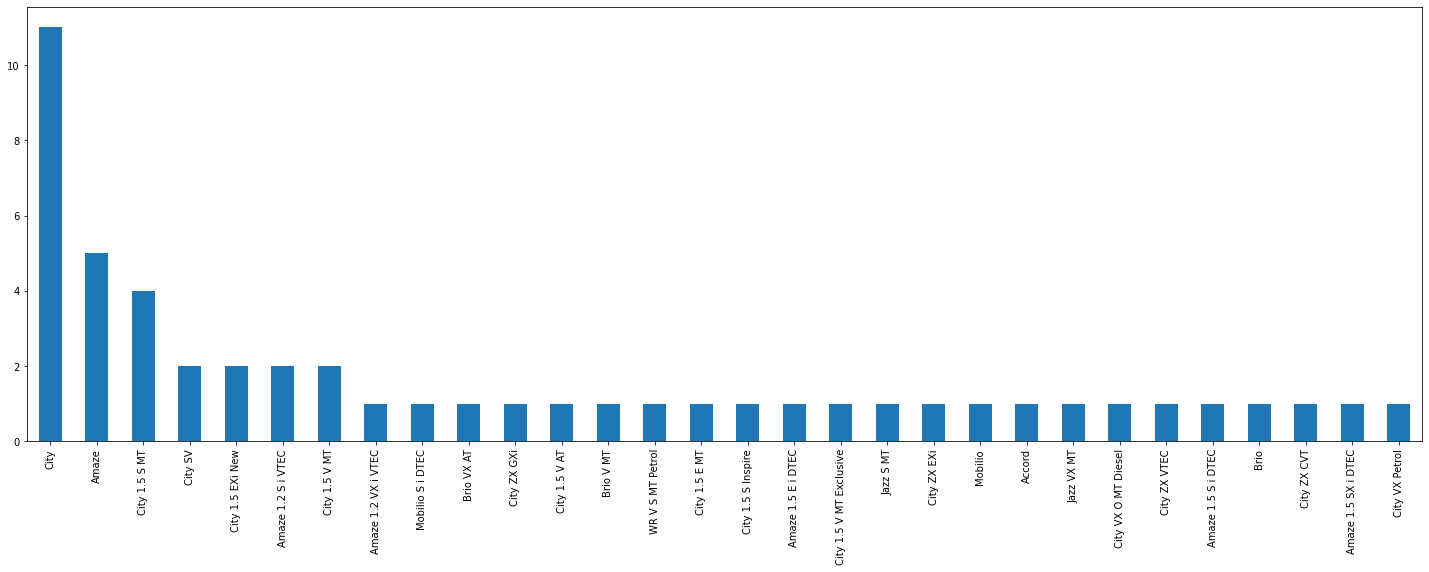

Before : 30
After : 7

City       31
Amaze      11
Brio        3
Jazz        2
Mobilio     2
Accord      1
WR          1
Name: name, dtype: int64


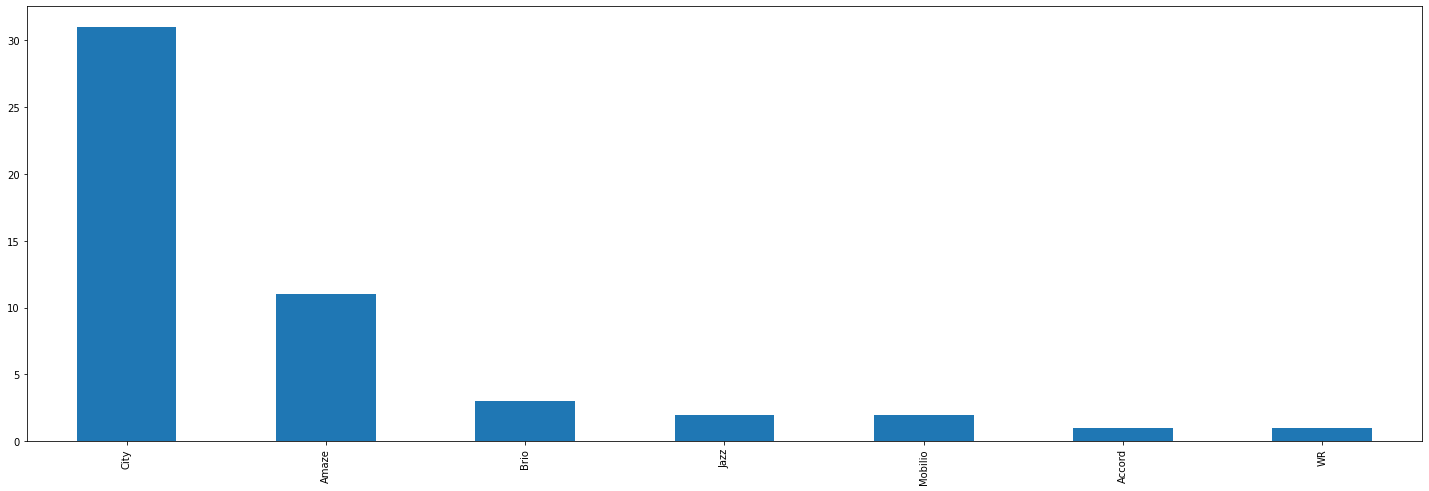

In [27]:
df_honda=brand_name('Honda') #Creating a separate dataframe that consists of honda cars, so that data cleaning would be easy
df_honda.at[712,'name']='WRV' # Honda has a model named WRV and its incorrectly entered as WR , so replacing it 

### Checking the quality of df_honda

In [28]:
df_honda.head() 

,name,company,year,Price,kms_driven,fuel_type
41,City,Honda,2011,"2,80,000","33,000 kms",Petrol
44,Amaze,Honda,2013,"2,84,999","46,000 kms",Diesel
45,Amaze,Honda,2015,"3,45,000","36,000 kms",Diesel
46,City,Honda,2015,"4,99,999","55,000 kms",Petrol
58,City,Honda,2017,"1,70,000","15,000 kms",Diesel


# Working with Maruti Suzuki

Dzire                        9
Swift Dzire VXi 1.2 BS IV    7
Alto 800 Lxi                 7
Wagon R LXi BS III           5
Wagon R                      5
                            ..
Zen Estilo                   1
Alto LX                      1
Wagon R Select Variant       1
Ritz GENUS VXI               1
Ritz VXI ABS                 1
Name: name, Length: 105, dtype: int64


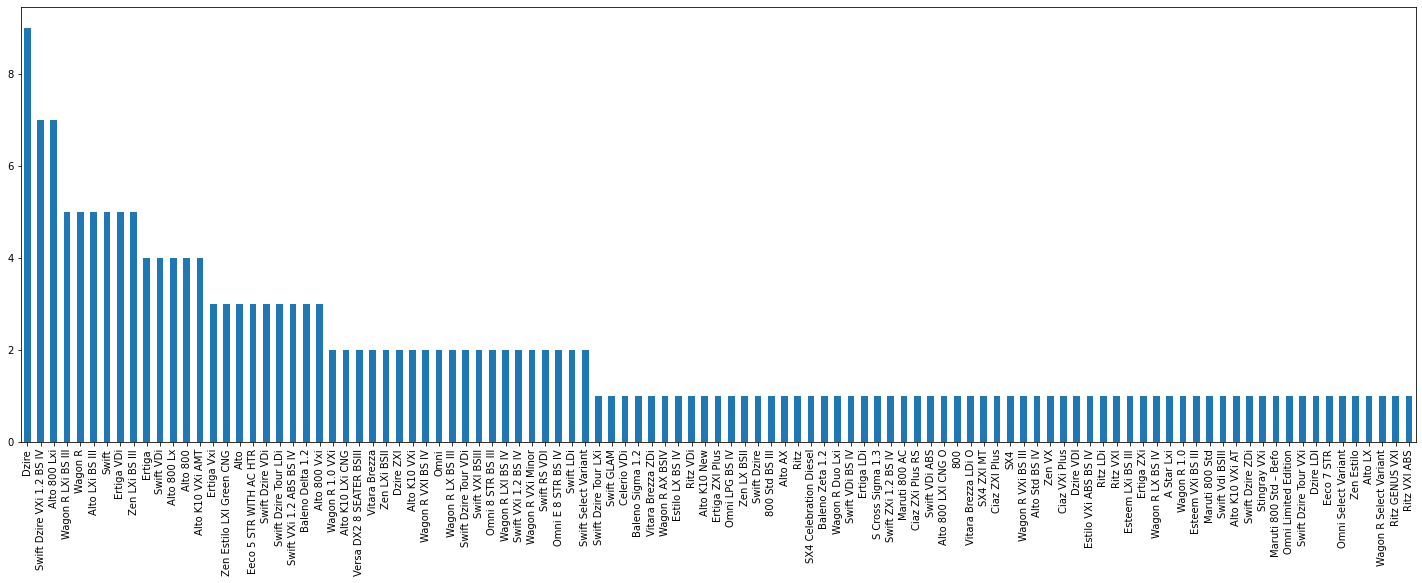

In [29]:
#Creating a separate dataframe that consists of Maruti cars, so that data cleaning would be easy
# Maruti car names are sometimes more than one worded , so passing False as argument. 
df_ms=brand_name('Maruti Suzuki',False)  

### The names are still too many , many are multiple entries of same car but different variants, so standardizing them all

In [30]:
samp=df_ms['name'].sort_values()

#Checking the count of models that starts with lower/upper case letters

for i in range(ord('A'),ord('Z')+1):
    print(chr(i),samp[(samp.str.startswith(chr(i)).values)].shape, end=' ,')
print()
print('-'*50)
for i in range(ord('a'),ord('z')+1):
    print(chr(i),samp[(samp.str.startswith(chr(i)).values)].shape, end=' ,')

A (41,) ,B (5,) ,C (4,) ,D (13,) ,E (23,) ,F (0,) ,G (0,) ,H (0,) ,I (0,) ,J (0,) ,K (0,) ,L (0,) ,M (3,) ,N (0,) ,O (9,) ,P (0,) ,Q (0,) ,R (6,) ,S (51,) ,T (0,) ,U (0,) ,V (6,) ,W (26,) ,X (0,) ,Y (0,) ,Z (13,) ,
--------------------------------------------------
a (0,) ,b (0,) ,c (0,) ,d (0,) ,e (0,) ,f (0,) ,g (0,) ,h (0,) ,i (0,) ,j (0,) ,k (0,) ,l (0,) ,m (0,) ,n (0,) ,o (0,) ,p (0,) ,q (0,) ,r (0,) ,s (0,) ,t (0,) ,u (0,) ,v (0,) ,w (0,) ,x (0,) ,y (0,) ,z (0,) ,

In [31]:
A_800 = samp[samp.str.startswith('Alto 800')].values #1
A_k10 = samp[samp.str.startswith('Alto K10')].values # 2
Alto=set(samp[(samp.str.startswith('Alto').values)] )
Alto = Alto.difference(set(A_800))
Alto = Alto.difference(set(A_k10))
Alto=np.array(list(Alto),dtype = 'object') #3
Baleno = samp[samp.str.startswith('Baleno')].values # 4
Ciaz = samp[samp.str.startswith('Ciaz')].values # 5
Dzire = samp[samp.str.startswith('Dzire')].values 
Ertiga = samp[samp.str.startswith('Ertiga')].values # 6
Eeco = samp[samp.str.startswith('Eeco')].values # 7
Esteem = samp[samp.str.startswith('Esteem')].values #8
Estilo = samp[samp.str.startswith('Estilo')].values
Maruti_800 = samp[samp.str.startswith('Maruti 800')].values # 9
Omni = samp[samp.str.startswith('Omni')].values #10
Ritz = samp[samp.str.startswith('Ritz')].values #11
Swift_D_Tour = samp[samp.str.startswith('Swift Dzire Tour')].values #12
SX4 = samp[samp.str.startswith('SX4')].values #13
pure_sd = samp[samp.str.contains('Swift Dzire')].values

#Separating swift dzire models from swift dzire tour
dzw = []
for i in pure_sd:
    if len(i) != 20:
        dzw.append(i)
for i in Dzire:
    dzw.append(i)
    
Swift_Dzire = np.array(dzw,dtype = 'object') #14 DZire new + old
swift = set(samp[(samp.str.startswith('Swift').values)])

#separating swift models from dzire and tour
swift = swift.difference(set(Swift_Dzire))
swift = swift.difference(set(Swift_D_Tour)) #Swift alone
swift=np.array(list(swift),dtype = 'object') #15

Versa=samp[(samp.str.startswith('Versa'))].values #16
Vitara_brezza=samp[(samp.str.startswith('Vitara Brezza'))].values #17
Wagon_R=samp[(samp.str.startswith('W'))].values #18
Zen_Estilo=samp[(samp.str.startswith('Zen Estilo'))].values #19
ze=[]
#Separating zen and zen estilo models

for i in Zen_Estilo:
        ze.append(i)
for i in Estilo:
    ze.append(i)
Zen_Estilo = np.array(ze,dtype = 'object')
Zen=set(samp[(samp.str.startswith('Zen').values)] )
Zen=Zen.difference(set(Zen_Estilo))
Zen=np.array(list(Zen),dtype = 'object') #20


###  Replacing all the inconsistent entries of Maruti suzuki cars

In [32]:
df_ms['name']=df_ms['name'].replace(A_800,'Alto 800')
df_ms['name']=df_ms['name'].replace(A_k10,'Alto K10')
df_ms['name']=df_ms['name'].replace(Alto,'Alto')
df_ms['name']=df_ms['name'].replace(Baleno,'Baleno')
df_ms['name']=df_ms['name'].replace(Ciaz,'Ciaz')
df_ms['name']=df_ms['name'].replace(Swift_Dzire,'Swift Dzire')
df_ms['name']=df_ms['name'].replace(Eeco,'Eeco')
df_ms['name']=df_ms['name'].replace(Ertiga,'Ertiga')
df_ms['name']=df_ms['name'].replace(Esteem,'Esteem')
df_ms['name']=df_ms['name'].replace(Zen_Estilo,'Zen Estilo')
df_ms['name']=df_ms['name'].replace(Maruti_800,'Maruti 800')
df_ms['name']=df_ms['name'].replace(Omni,'Omni')
df_ms['name']=df_ms['name'].replace(Ritz,'Ritz')
df_ms['name']=df_ms['name'].replace(SX4,'SX4')
df_ms['name']=df_ms['name'].replace(Swift_D_Tour,'Swift Dzire Tour')
df_ms['name']=df_ms['name'].replace(swift,'Swift')
df_ms['name']=df_ms['name'].replace(Versa,'Versa')
df_ms['name']=df_ms['name'].replace(Vitara_brezza,'Vitara Brezza')
df_ms['name']=df_ms['name'].replace(Wagon_R,'Wagon R')
df_ms['name']=df_ms['name'].replace(Zen,'Zen')
df_ms['name']=df_ms['name'].replace('800 Std BS III', 'Maruti 800')
df_ms['name']=df_ms['name'].replace('800','Maruti 800')
df_ms['name']=df_ms['name'].replace('A Star Lxi','A Star')           
df_ms['name']=df_ms['name'].replace("Stingray VXi","Stingray")         
df_ms['name']=df_ms['name'].replace('Celerio VDi','Celerio')          
df_ms['name']=df_ms['name'].replace('S Cross Sigma 1.3', 'S Cross') 

In [33]:
len(df_ms['name'].value_counts())

24

###  Final Bar plot to check the entries and its frequency of maruti suzuki cars

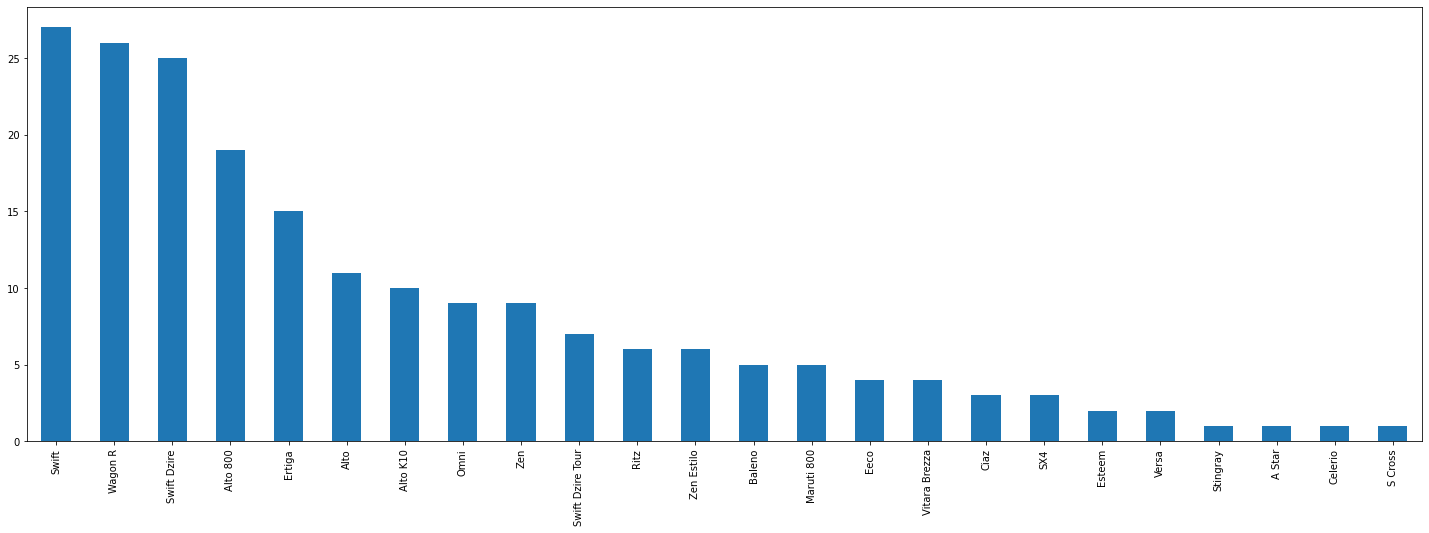

In [34]:
plt.figure(figsize=(25,8))
df_ms['name'].value_counts().plot(kind="bar")
plt.show()

### Checking the quality of df_ms

In [35]:
df_ms.head()

,name,company,year,Price,kms_driven,fuel_type
9,Alto K10,Maruti,2015,"2,50,000","60,000 kms",Petrol
11,Stingray,Maruti,2015,"3,15,000","30,000 kms",Petrol
19,Alto 800,Maruti,2014,"1,60,000","35,550 kms",Petrol
22,Alto 800,Maruti,2015,"75,000","39,000 kms",Petrol
26,Alto 800,Maruti,2017,"1,90,000","72,000 kms",Petrol


# Working with Mahindra

XUV500                                5
Scorpio S10                           4
TUV300 T4 Plus                        4
Scorpio                               4
Jeep CL550 MDI                        3
Scorpio SLX                           3
Scorpio SLE BS IV                     3
Jeep MM 550 XDB                       3
Scorpio S4                            3
XUV500 W8                             3
Quanto C8                             3
XUV500 W6                             3
XUV500 W10                            2
Xylo E8                               2
KUV100                                2
Xylo D2 BS IV                         2
Scorpio 2.6 CRDe                      2
KUV100 K8 D 6 STR                     2
Scorpio VLX Special Edition BS III    1
Scorpio VLX 2WD BS IV                 1
Logan                                 1
KUV100 K8 6 STR                       1
Scorpio VLX 2.2 mHawk Airbag BSIV     1
Xylo E8 BS IV                         1
Xylo D2                               1


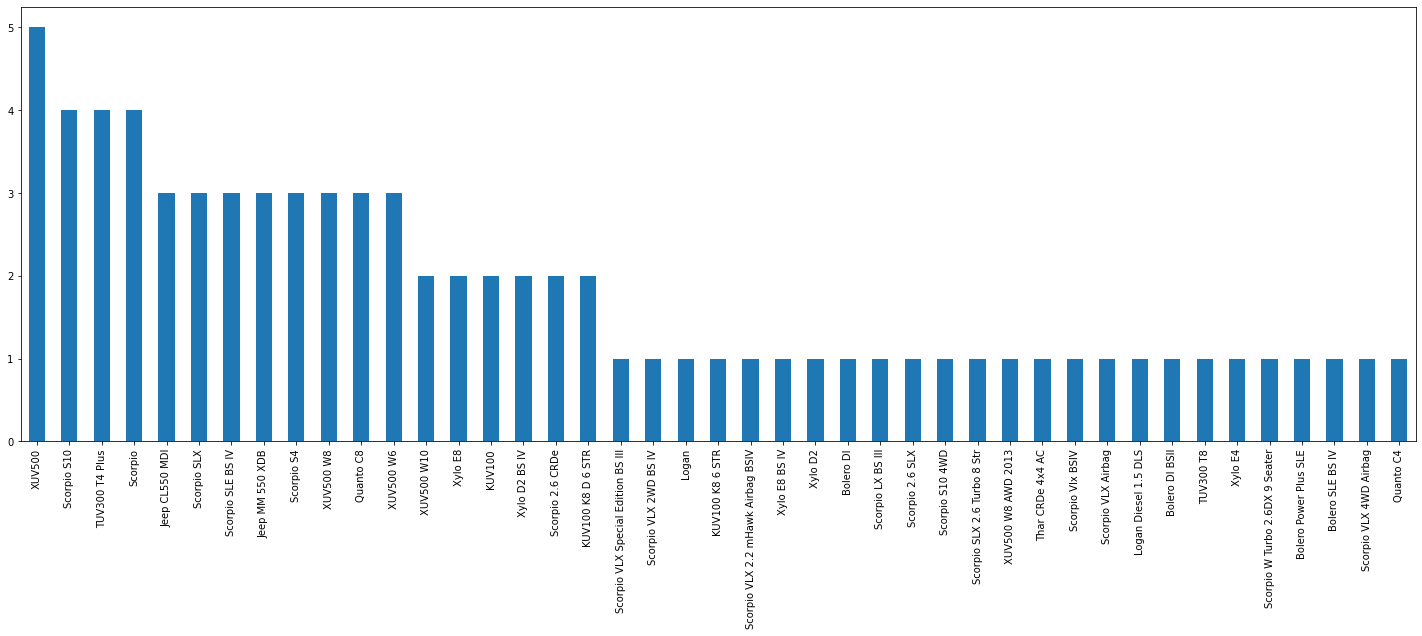

Before : 43
After : 10

Scorpio    30
XUV500     14
Xylo        7
Jeep        6
TUV300      5
KUV100      5
Bolero      4
Quanto      4
Logan       2
Thar        1
Name: name, dtype: int64


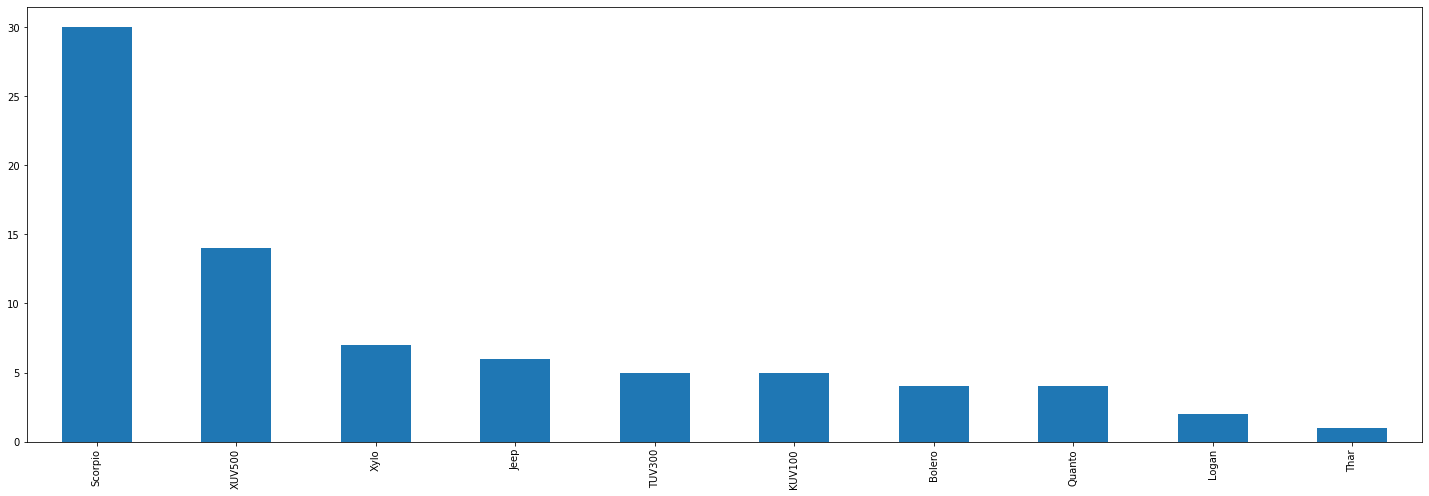

In [36]:
df_m=brand_name('Mahindra')

### Checking the quality of df_m

In [37]:
df_m.head()

,name,company,year,Price,kms_driven,fuel_type
1,Jeep,Mahindra,2006,"4,25,000",40 kms,Diesel
13,Scorpio,Mahindra,2015,"3,20,000","48,660 kms",Diesel
18,Scorpio,Mahindra,2016,"3,50,000","43,000 kms",Diesel
21,Scorpio,Mahindra,2016,"3,10,000","39,522 kms",Diesel
29,Bolero,Mahindra,2017,"1,80,000","23,452 kms",Diesel


# Working with Hyundai data

Elite i20                  5
Eon Era Plus               5
Eon                        4
Elite i20 Magna 1.2        4
Eon D Lite Plus            4
                          ..
Elite i20 Asta 1.4 CRDI    1
i20 Magna O 1.2            1
Verna 1.6 EX VTVT          1
Xcent Base 1.1 CRDi        1
Getz                       1
Name: name, Length: 77, dtype: int64


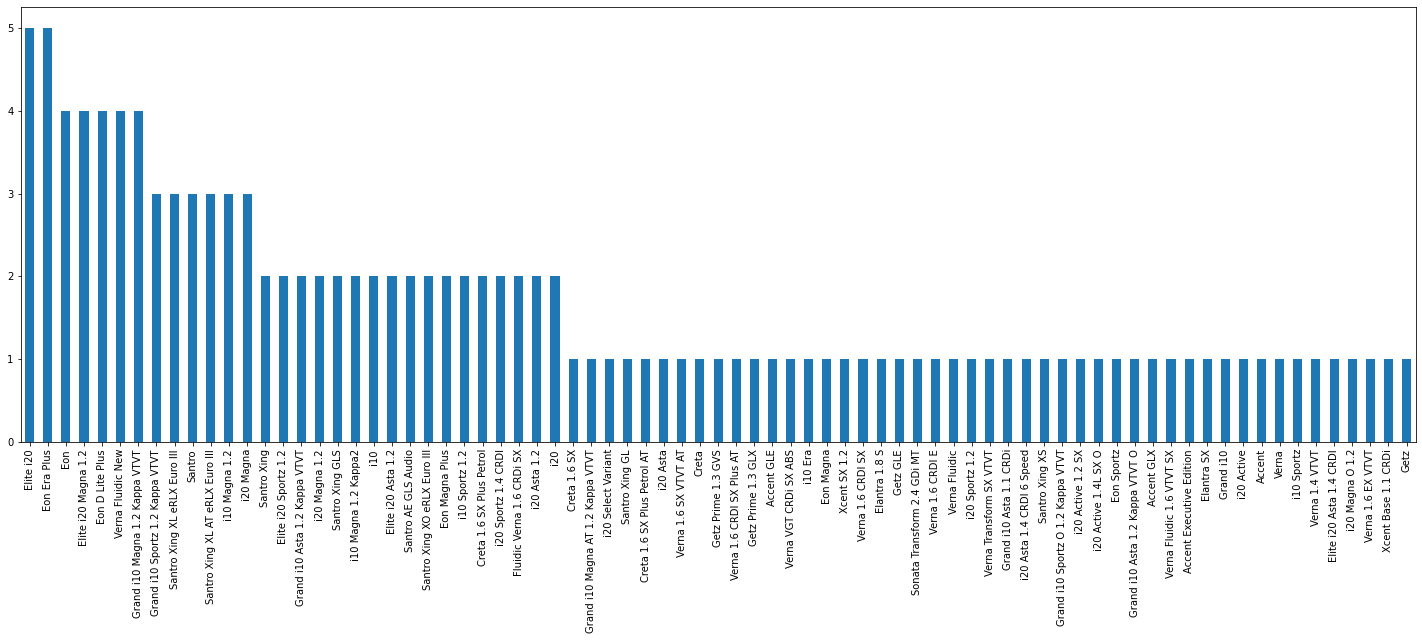

In [38]:
# Hyundai car names are sometimes more than one worded , so passing False as argument. 

df_h=brand_name('Hyundai',False)

### The names are still too many , many are multiple entries of same car but different variants, so standardizing them all

In [39]:
samp=df_h['name']


#Checking the count of models that starts with lower/upper case letters

for i in range(ord('A'),ord('Z')+1):
    print(chr(i),samp[(samp.str.startswith(chr(i)).values)].shape, end=' ,')
print()
print('-'*50)
for i in range(ord('a'),ord('z')+1):
    print(chr(i),samp[(samp.str.startswith(chr(i)).values)].shape, end=' ,')

A (4,) ,B (0,) ,C (5,) ,D (0,) ,E (33,) ,F (2,) ,G (18,) ,H (0,) ,I (0,) ,J (0,) ,K (0,) ,L (0,) ,M (0,) ,N (0,) ,O (0,) ,P (0,) ,Q (0,) ,R (0,) ,S (20,) ,T (0,) ,U (0,) ,V (15,) ,W (0,) ,X (2,) ,Y (0,) ,Z (0,) ,
--------------------------------------------------
a (0,) ,b (0,) ,c (0,) ,d (0,) ,e (0,) ,f (0,) ,g (0,) ,h (0,) ,i (30,) ,j (0,) ,k (0,) ,l (0,) ,m (0,) ,n (0,) ,o (0,) ,p (0,) ,q (0,) ,r (0,) ,s (0,) ,t (0,) ,u (0,) ,v (0,) ,w (0,) ,x (0,) ,y (0,) ,z (0,) ,

In [40]:
Accent=samp[samp.str.startswith('Accent')].values
Creta=samp[samp.str.startswith('Creta')].values
Eon=samp[(samp.str.startswith('Eon'))].values
Elite_i20=samp[(samp.str.startswith('Elite'))].values
Elantra=samp[(samp.str.startswith('Elantra'))].values
#F_verna=samp[(samp.str.startswith('F'))].values
Grand_i10=samp[(samp.str.startswith('Grand'))].values
i10=samp[(samp.str.startswith('i10'))].values
i20=samp[(samp.str.startswith('i20'))].values
i20_active=samp[(samp.str.startswith('i20 Active'))].values
i20=set(i20).difference(set(i20_active))
i20=np.array(list(i20),dtype = 'object')
Getz=samp[(samp.str.startswith('Getz'))].values
Santro=samp[(samp.str.startswith('Santro'))].values
Verna=samp[(samp.str.contains('Verna'))].values
Xcent=samp[(samp.str.startswith('X'))].values

In [41]:
df_h['name']=df_h['name'].replace(Accent,'Accent')
df_h['name']=df_h['name'].replace(Creta,'Creta')
df_h['name']=df_h['name'].replace(Eon,'Eon')
df_h['name']=df_h['name'].replace(Elite_i20,'Elite i20')
df_h['name']=df_h['name'].replace(Elantra,'Elantra')
df_h['name']=df_h['name'].replace(Grand_i10,'Grand i10')
df_h['name']=df_h['name'].replace(Getz,'Getz')
df_h['name']=df_h['name'].replace(i10,'i10')
df_h['name']=df_h['name'].replace(i20,'i20')
df_h['name']=df_h['name'].replace(i20_active,'i20 Active')
df_h['name']=df_h['name'].replace(Santro,'Santro')
df_h['name']=df_h['name'].replace(Verna,'Verna')
df_h['name']=df_h['name'].replace(Xcent,'Xcent')
df_h['name']=df_h['name'].replace('Sonata Transform 2.4 GDi MT','Sonata Transform')

###  Final Bar plot to check the entries and its frequency of Hyundai cars

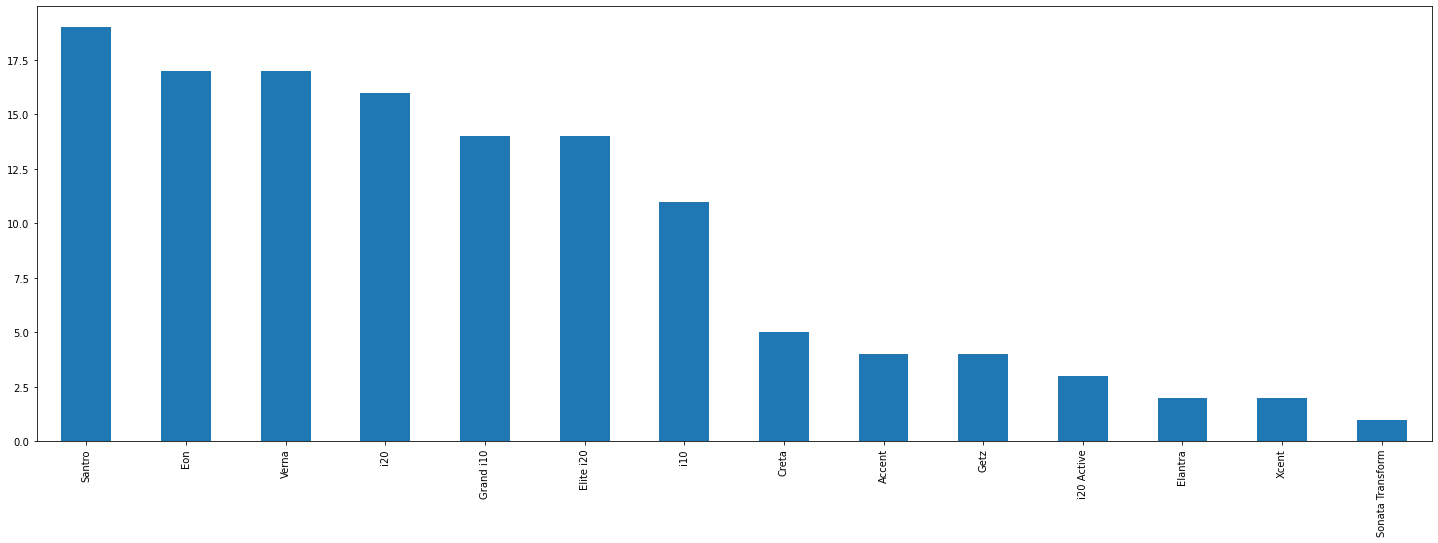

In [42]:
plt.figure(figsize=(25,8))
df_h['name'].value_counts().plot(kind="bar")
plt.show()

# Working with TATA

Zest XE 75 PS Diesel               4
Indigo eCS LX TDI BS III           3
Indigo eCS LX CR4 BS IV            2
Indigo CS eLX BS IV                2
Nano                               2
Indica eV2 LS                      2
Sumo Gold LX BS IV                 2
Indigo LX TDI BS III               2
Tiago Revotron XM                  1
Manza Aqua Quadrajet               1
Venture EX 8 STR                   1
Sumo Gold EX BS IV                 1
Indigo CS GLS                      1
Indica V2 DLS BS III               1
Indica eV2 eXeta eGLX              1
Indigo eCS LS CR4 BS IV            1
Nano LX Special Edition            1
Indica V2 LS                       1
Sumo Grande MKII GX                1
Tiago Revotron XZ                  1
Indigo eCS                         1
Sumo Gold FX BSIII                 1
Bolt XM Petrol                     1
Indica V2 DLX BS III               1
Indica V2                          1
Manza                              1
Indica V2 DLE BS III               1
T

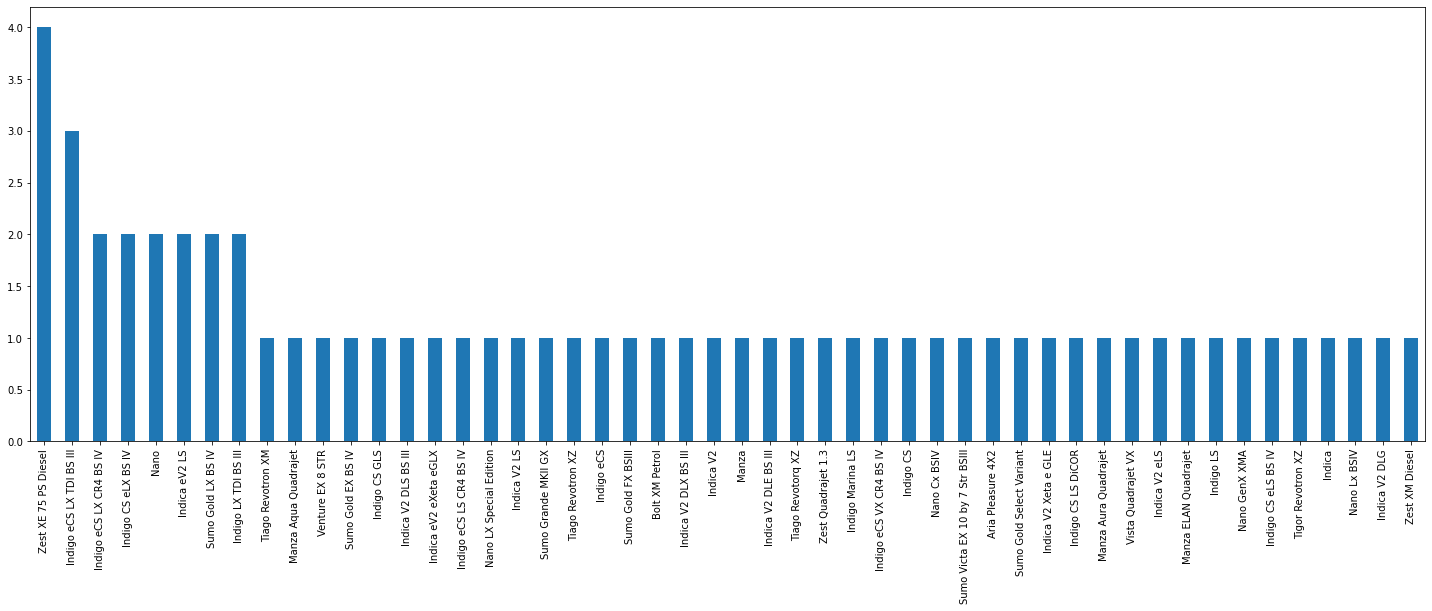

In [43]:

# Maruti car names are sometimes more than one worded , so passing False as argument. 
df_tata=brand_name('Tata',False)

In [44]:
samp=df_tata['name']

for i in range(ord('A'),ord('Z')+1):
    print(chr(i),samp[(samp.str.startswith(chr(i)).values)].shape, end=' ,')
print()
print('-'*50)
for i in range(ord('a'),ord('z')+1):
    print(chr(i),samp[(samp.str.startswith(chr(i)).values)].shape, end=' ,')

A (1,) ,B (1,) ,C (0,) ,D (0,) ,E (0,) ,F (0,) ,G (0,) ,H (0,) ,I (30,) ,J (0,) ,K (0,) ,L (0,) ,M (4,) ,N (6,) ,O (0,) ,P (0,) ,Q (0,) ,R (0,) ,S (7,) ,T (4,) ,U (0,) ,V (2,) ,W (0,) ,X (0,) ,Y (0,) ,Z (6,) ,
--------------------------------------------------
a (0,) ,b (0,) ,c (0,) ,d (0,) ,e (0,) ,f (0,) ,g (0,) ,h (0,) ,i (0,) ,j (0,) ,k (0,) ,l (0,) ,m (0,) ,n (0,) ,o (0,) ,p (0,) ,q (0,) ,r (0,) ,s (0,) ,t (0,) ,u (0,) ,v (0,) ,w (0,) ,x (0,) ,y (0,) ,z (0,) ,

In [45]:
Indica_v2=np.array(['Indica V2 eLS', 'Indica V2 Xeta e GLE',  
       'Indica V2 DLG',  'Indica V2 DLS BS III',
        'Indica V2 LS', 'Indica V2 DLX BS III',
       'Indica V2',  'Indica V2 DLE BS III'], dtype=object)
Indica_ev2=np.array(['Indica eV2 LS','Indica eV2 LS','Indica eV2 eXeta eGLX','Indica eV2 LS',], dtype=object)
Indigo_cs=np.array(['Indigo CS', 'Indigo CS LS DiCOR','Indigo CS eLS BS IV', 'Indigo CS eLX BS IV','Indigo CS GLS',
               'Indigo CS eLX BS IV'],dtype=object)
Indigo_ecs=np.array(['Indigo eCS LS CR4 BS IV', 'Indigo eCS LX TDI BS III',
       'Indigo eCS LX TDI BS III','Indigo eCS VX CR4 BS IV','Indigo eCS LX TDI BS III',
       'Indigo eCS LX CR4 BS IV', 'Indigo eCS', 'Indigo eCS LX CR4 BS IV'],dtype=object)
Indigo=np.array(['Indigo LX TDI BS III', 'Indigo LS'],dtype=object)
Indigo_manza=samp[(samp.str.startswith('M'))].values
Nano=samp[(samp.str.startswith('Na'))].values
Sumo_gold=samp[(samp.str.startswith('Sumo Gold'))].values
Tiago=samp[(samp.str.startswith('Tiago'))].values
Zest=samp[(samp.str.startswith('Z'))].values

In [46]:
df_tata['name']=df_tata['name'].replace('Aria Pleasure 4X2','Aria')
df_tata['name']=df_tata['name'].replace('Bolt XM Petrol','Bolt')
df_tata['name']=df_tata['name'].replace('Indigo Marina LS','Indigo Marina')
df_tata['name']=df_tata['name'].replace('Sumo Grande MKII GX','Sumo Grande')
df_tata['name']=df_tata['name'].replace('Sumo Victa EX 10 by 7 Str BSIII','Sumo Victa')
df_tata['name']=df_tata['name'].replace('Tigor Revotron XZ','Tigor')
df_tata['name']=df_tata['name'].replace('Vista Quadrajet VX','Indica Vista')
df_tata['name']=df_tata['name'].replace('Venture EX 8 STR','Venture')
df_tata['name']=df_tata['name'].replace(Indica_v2,'Indica v2')
df_tata['name']=df_tata['name'].replace(Indica_ev2,'Indica ev2')
df_tata['name']=df_tata['name'].replace(Indigo,'Indigo')
df_tata['name']=df_tata['name'].replace(Indigo_cs,'Indigo cs')
df_tata['name']=df_tata['name'].replace(Indigo_ecs,'Indigo ecs')
df_tata['name']=df_tata['name'].replace(Indigo_manza,'Indigo Manza')
df_tata['name']=df_tata['name'].replace(Nano,'Nano')
df_tata['name']=df_tata['name'].replace(Sumo_gold,'Sumo Gold')
df_tata['name']=df_tata['name'].replace(Tiago,'Tiago')
df_tata['name']=df_tata['name'].replace(Zest,'Zest')

###  Final Bar plot to check the entries and its frequency of Tata cars

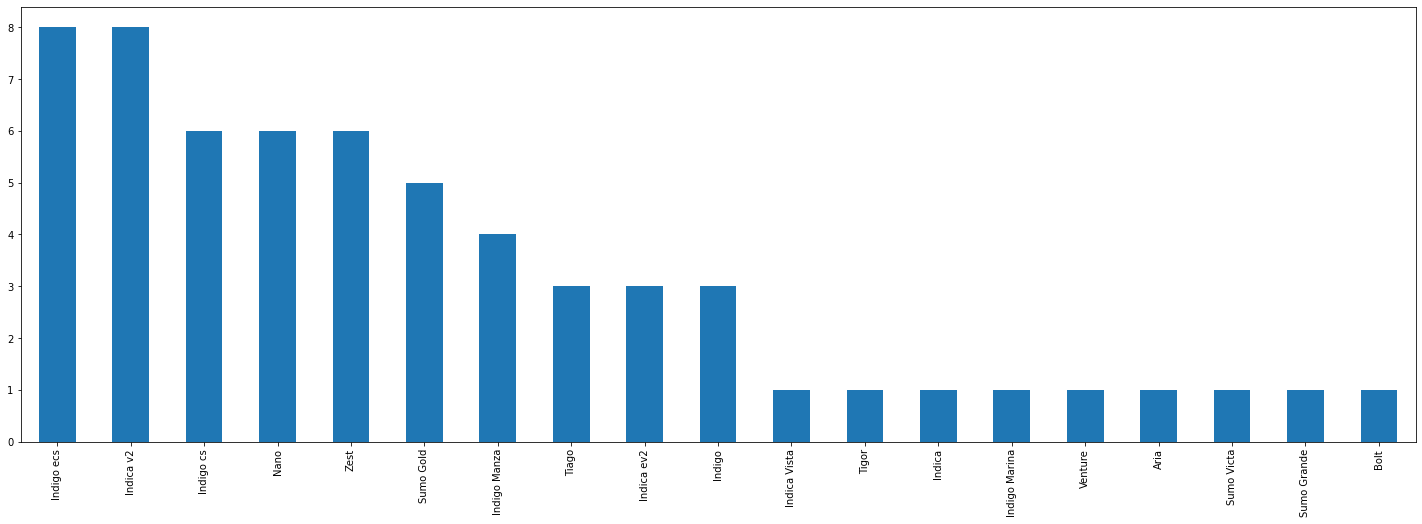

In [47]:
plt.figure(figsize=(25,8))
df_tata['name'].value_counts().plot(kind="bar")
plt.show()

# Working with Toyota

Corolla Altis                   2
Fortuner 3.0 4x4 MT             2
Etios GD                        2
Etios Liva G                    2
Corolla                         2
Corolla Altis 1.8 J             2
Corolla Altis GL Petrol         2
Innova 2.0 G 8 STR BS IV        1
Etios Liva GD                   1
Innova 2.5 V 7 STR              1
Innova 2.0 G4                   1
Innova 2.5 E 8 STR              1
Etios Liva Diesel               1
Corolla Altis VL AT Petrol      1
Innova 2.5 Z Diesel 7 Seater    1
Etios G                         1
Fortuner 3.0 4x2 MT             1
Innova 2.5 E MS 7 STR BS IV     1
Corolla H2                      1
Corolla Altis Diesel D4DG       1
Fortuner                        1
Etios Liva                      1
Etios                           1
Innova 2.5 G BS III 8 STR       1
Innova 2.5 GX BS IV 7 STR       1
Corolla Altis 1.8 GL            1
Corolla Altis Petrol Ltd        1
Qualis                          1
Name: name, dtype: int64


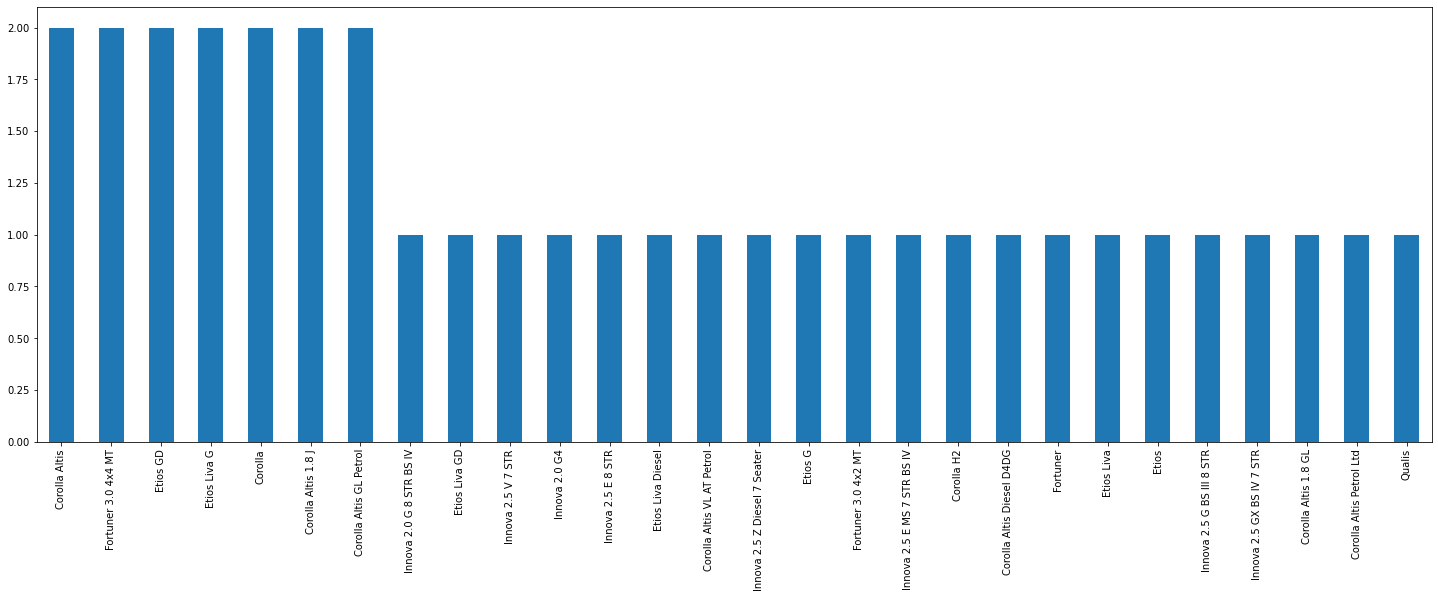

In [48]:

# Maruti car names are sometimes more than one worded , so passing False as argument. 
df_toy=brand_name('Toyota',False)

In [49]:
samp=df_toy['name']

for i in range(ord('A'),ord('Z')+1):
    print(chr(i),samp[(samp.str.startswith(chr(i)).values)].shape, end=' ,')
print()
print('-'*50)
for i in range(ord('a'),ord('z')+1):
    print(chr(i),samp[(samp.str.startswith(chr(i)).values)].shape, end=' ,')


A (0,) ,B (0,) ,C (13,) ,D (0,) ,E (9,) ,F (4,) ,G (0,) ,H (0,) ,I (8,) ,J (0,) ,K (0,) ,L (0,) ,M (0,) ,N (0,) ,O (0,) ,P (0,) ,Q (1,) ,R (0,) ,S (0,) ,T (0,) ,U (0,) ,V (0,) ,W (0,) ,X (0,) ,Y (0,) ,Z (0,) ,
--------------------------------------------------
a (0,) ,b (0,) ,c (0,) ,d (0,) ,e (0,) ,f (0,) ,g (0,) ,h (0,) ,i (0,) ,j (0,) ,k (0,) ,l (0,) ,m (0,) ,n (0,) ,o (0,) ,p (0,) ,q (0,) ,r (0,) ,s (0,) ,t (0,) ,u (0,) ,v (0,) ,w (0,) ,x (0,) ,y (0,) ,z (0,) ,

In [50]:
Corolla_Altis=np.array(['Corolla Altis Diesel D4DG', 'Corolla Altis Petrol Ltd','Corolla Altis 1.8 GL', 
                        'Corolla Altis 1.8 J','Corolla Altis 1.8 J', 'Corolla Altis','Corolla Altis GL Petrol', 
                        'Corolla Altis GL Petrol','Corolla Altis VL AT Petrol','Corolla Altis' ],dtype=object)
Etios=np.array(['Etios GD',  'Etios GD', 'Etios','Etios G'],dtype=object)
Etios_liva=np.array(['Etios Liva G','Etios Liva','Etios Liva GD', 'Etios Liva G', 'Etios Liva Diesel',],dtype=object)
Fortuner=samp[(samp.str.startswith('F'))].values
Innova=samp[(samp.str.startswith('I'))].values

In [51]:
df_toy['name']=df_toy['name'].replace('Corolla H2','Corolla')
df_toy['name']=df_toy['name'].replace(Corolla_Altis,'Corolla Altis')
df_toy['name']=df_toy['name'].replace(Etios,'Etios')
df_toy['name']=df_toy['name'].replace(Etios_liva,'Etios liva')
df_toy['name']=df_toy['name'].replace(Fortuner,'Fortuner')
df_toy['name']=df_toy['name'].replace(Innova,'Innova')

###  Final Bar plot to check the entries and its frequency of Toyota cars

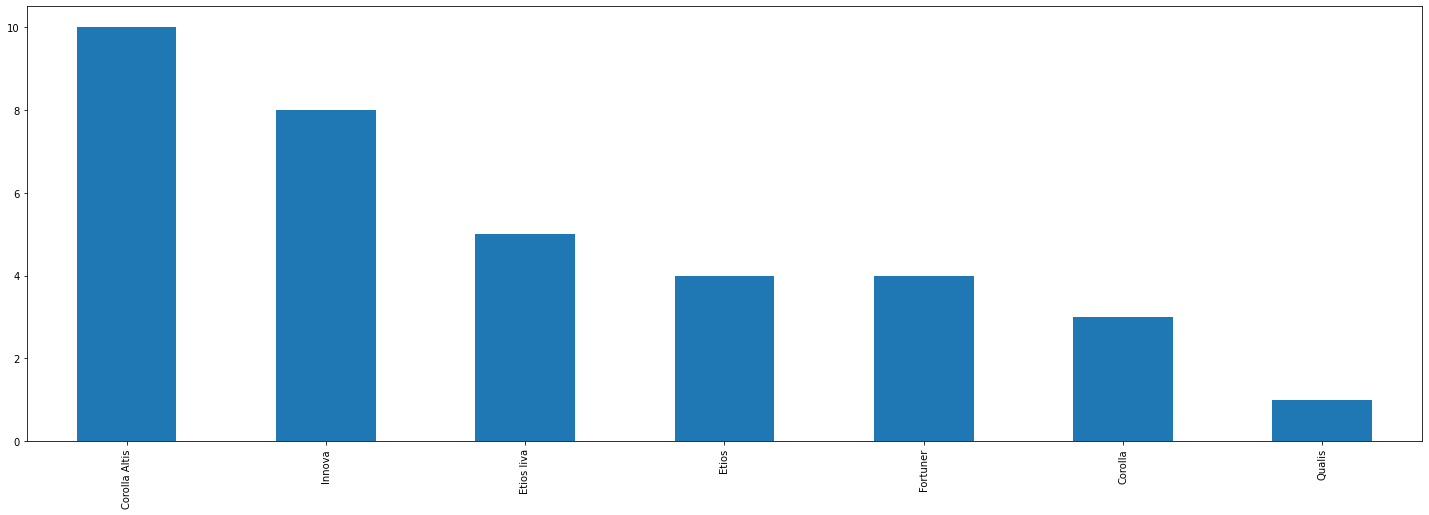

In [52]:
plt.figure(figsize=(25,8))
df_toy['name'].value_counts().plot(kind="bar")
plt.show()

# Working with Chevrolet

In [53]:
dfnew[dfnew['name']=='Chevrolet Tavera Neo']

,name,company,year,Price,kms_driven,fuel_type
251,Chevrolet Tavera Neo,Chevrolet,2013,"3,75,000","55,000 kms",Diesel
872,Chevrolet Tavera Neo,Chevrolet,2007,"4,65,000","1,00,800 kms",Diesel


Beat LS Diesel                4
Beat LT Diesel                4
Beat LS Petrol                3
Beat Diesel                   3
Spark LS 1.0                  2
Tavera Neo                    2
Beat PS Diesel                1
Tavera LS B3 10 Seats BSII    1
Beat LT Petrol                1
Cruze LTZ                     1
Enjoy                         1
Spark 1.0 LT                  1
Cruze LTZ AT                  1
Sail UVA Petrol LT ABS        1
Spark LT 1.0 Airbag           1
Enjoy 1.4 LS 8 STR            1
Beat LT Opt Diesel            1
Spark LT 1.0                  1
Beat                          1
Spark                         1
Sail 1.2 LS                   1
Name: name, dtype: int64


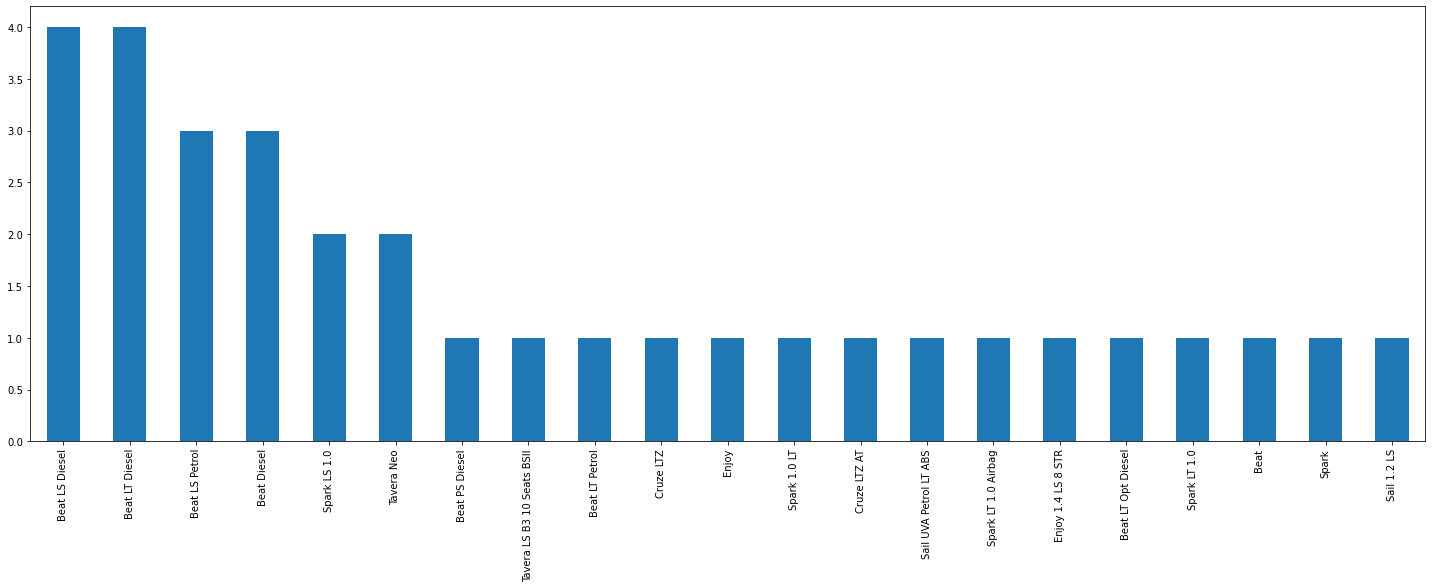

Before : 21
After : 6

Beat      18
Spark      6
Tavera     3
Enjoy      2
Sail       2
Cruze      2
Name: name, dtype: int64


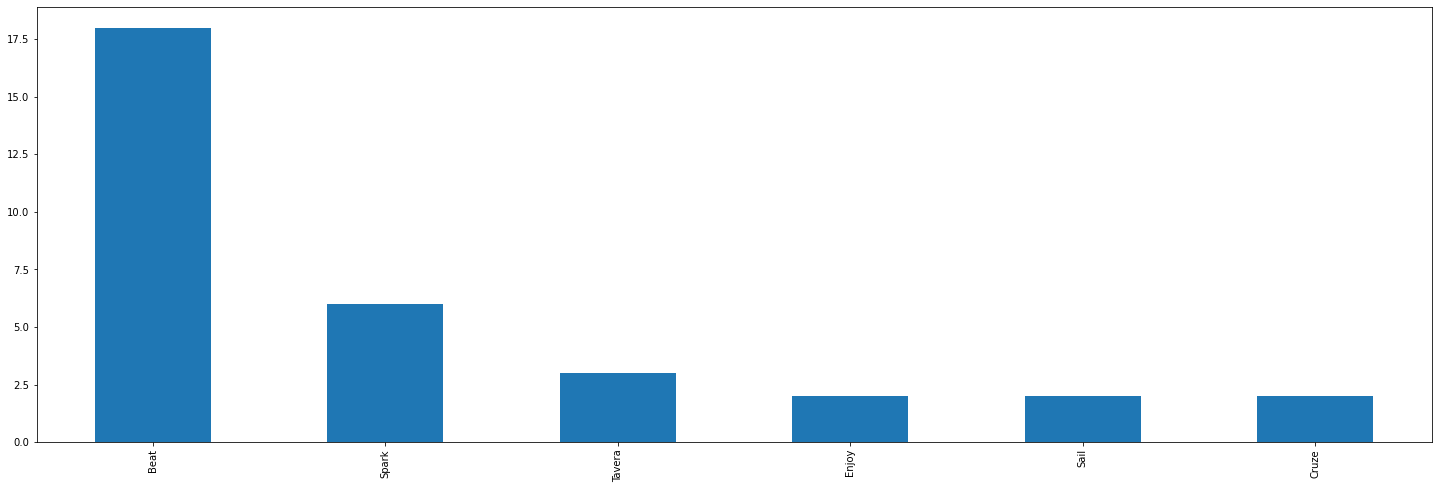

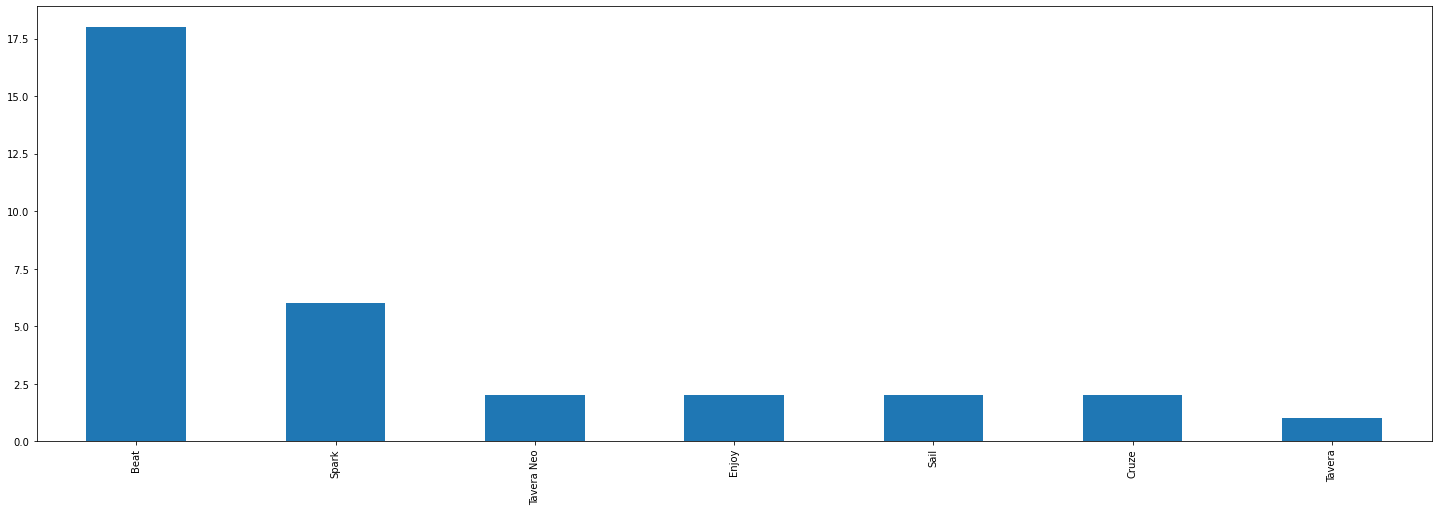

In [54]:
df_ch=brand_name('Chevrolet')
df_ch.at[251,'name']='Tavera Neo'
df_ch.at[872,'name']='Tavera Neo'
plt.figure(figsize=(25,8))
df_ch['name'].value_counts().plot(kind="bar")
plt.show()

# Working with Volkswagen

Polo                                 4
Vento Highline Plus 1.5 Diesel AT    2
Polo Highline1.2L P                  2
Polo Highline Exquisite P            1
Jetta Highline TDI AT                1
Polo Comfortline 1.2L P              1
Passat Diesel Comfortline AT         1
Vento Konekt Diesel Highline         1
Polo Trendline 1.5L D                1
Vento Comfortline Petrol             1
Jetta Comfortline 1.9 TDI AT         1
Vento Comfortline Diesel             1
Name: name, dtype: int64


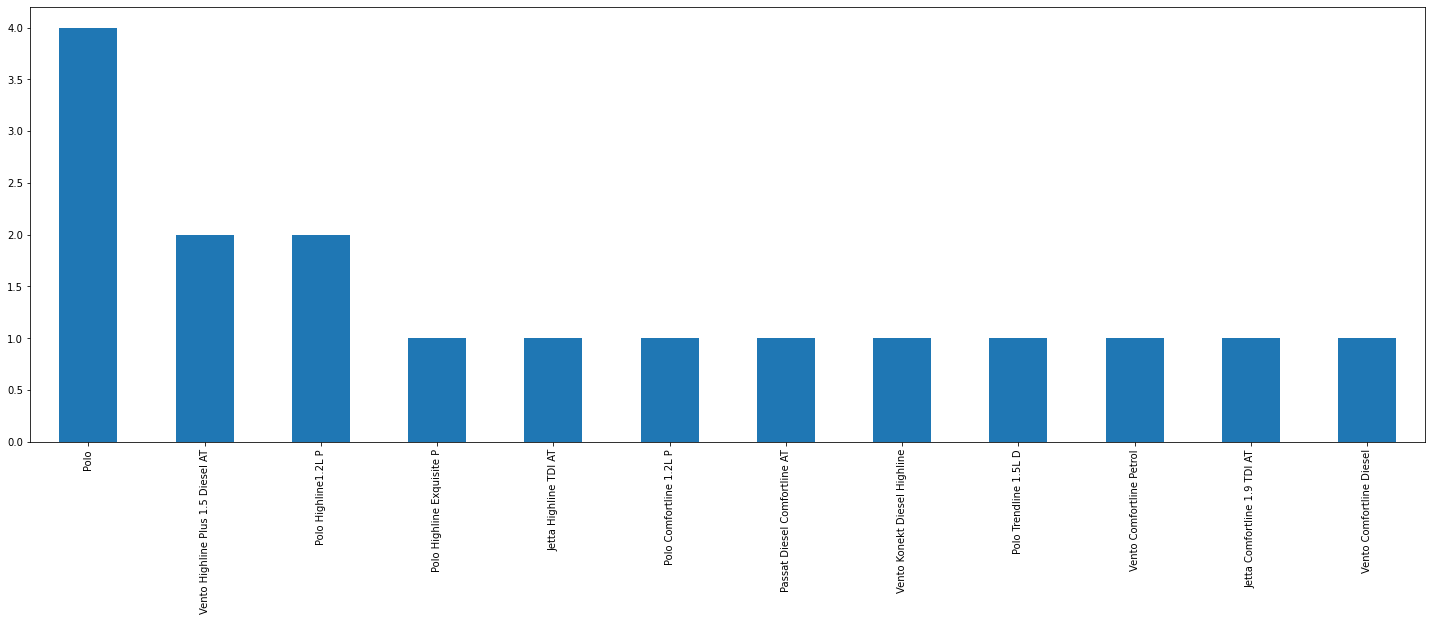

Before : 12
After : 4

Polo      9
Vento     5
Jetta     2
Passat    1
Name: name, dtype: int64


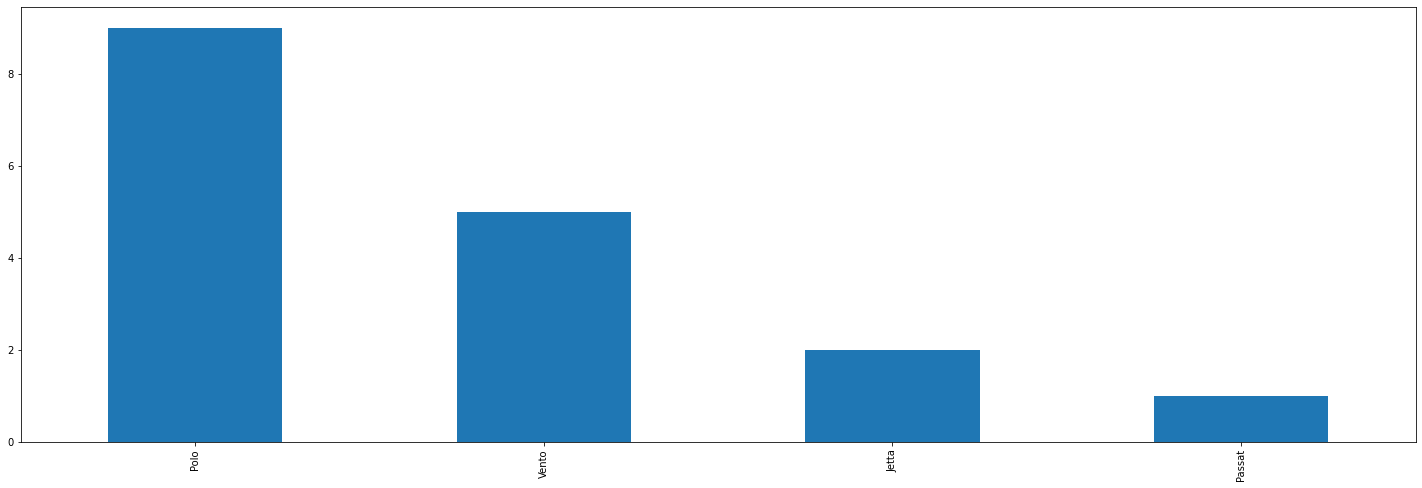

In [55]:
df_vw=brand_name('Volkswagen')

# Working with Renault

Duster                                      5
Kwid RXT                                    3
Duster 85 PS RxE Diesel                     2
Duster 85 PS RxL Diesel                     2
Lodgy 85 PS RXL                             1
Scala RxL Diesel                            1
Duster RxL Petrol                           1
Kwid 1.0                                    1
Duster 110 PS RxZ Diesel                    1
Duster 85PS Diesel RxL Optional with Nav    1
Duster 85 PS RxL Explore LE                 1
Kwid RXT Opt                                1
Kwid 1.0 RXT AMT                            1
Duster 110 PS RxZ Diesel Plus               1
Scala RxL Diesel Travelogue                 1
Kwid                                        1
Duster 110PS Diesel RxZ                     1
Duster 110 PS RxL Diesel                    1
Name: name, dtype: int64


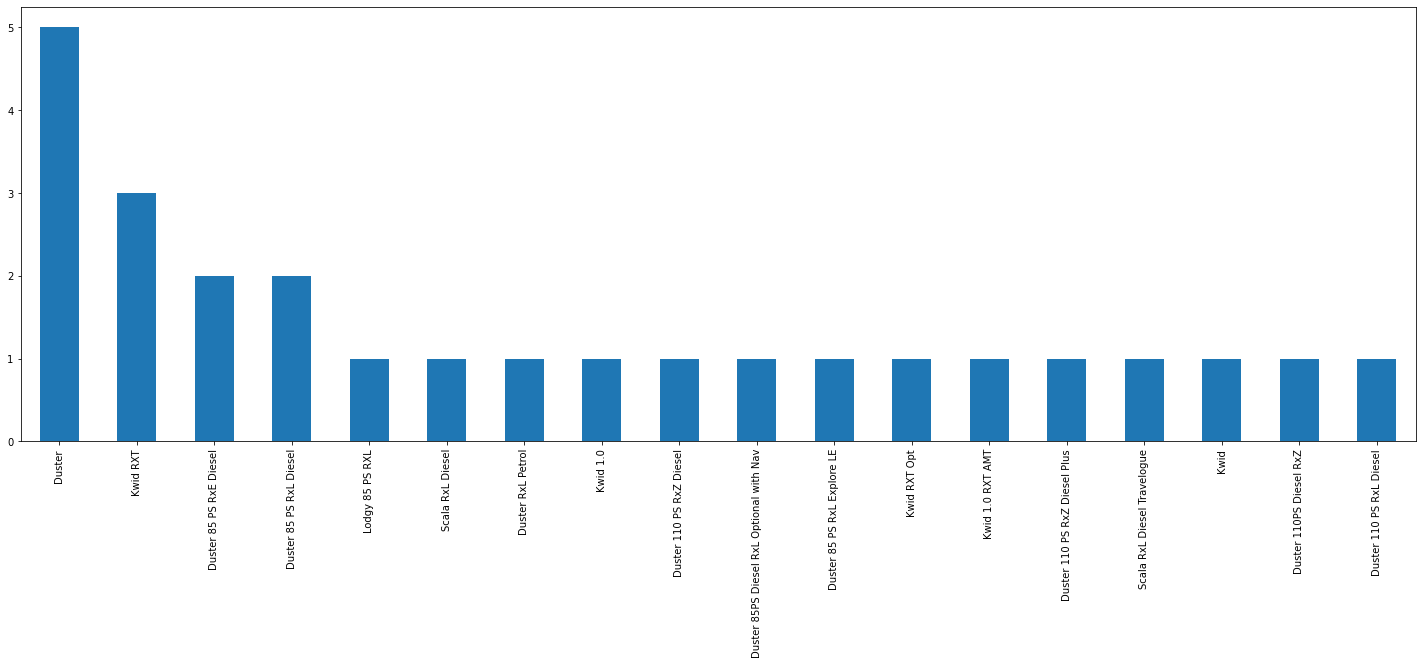

Before : 18
After : 4

Duster    16
Kwid       7
Scala      2
Lodgy      1
Name: name, dtype: int64


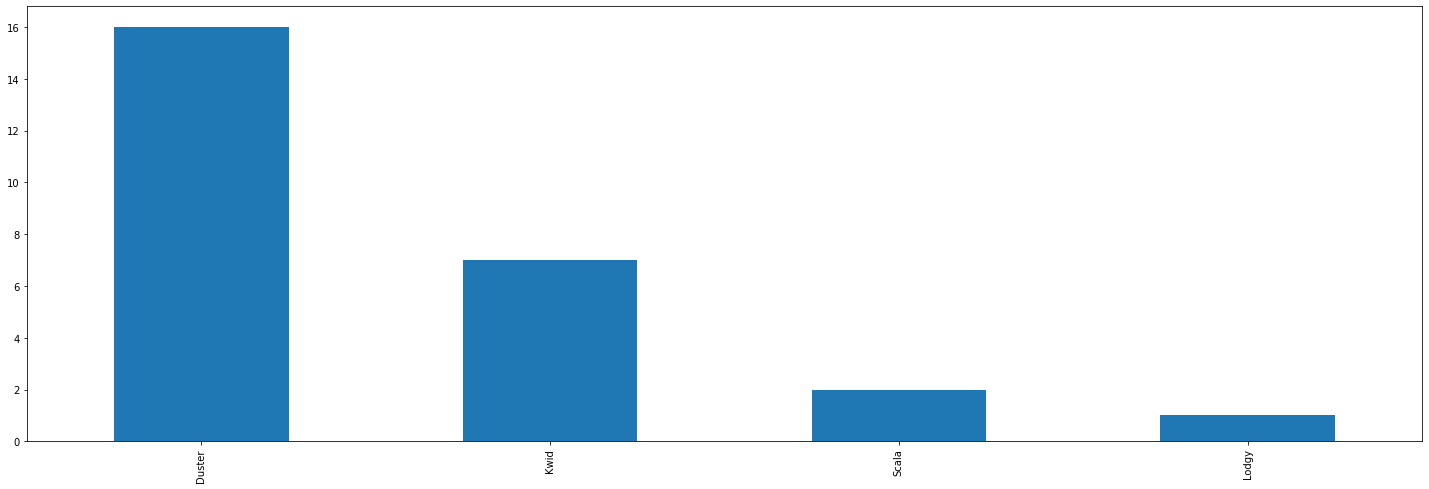

In [56]:
df_ren=brand_name('Renault')

# Working with Ford

EcoSport Titanium 1.5L TDCi          4
EcoSport Trend 1.5L TDCi             3
EcoSport Titanium 1.5 TDCi           2
Figo Petrol LXI                      1
Ikon 1.3 Flair Josh 100              1
Fusion 1.4 TDCi Diesel               1
Figo Petrol Titanium                 1
EcoSport Trend 1.5L Ti VCT           1
Ikon 1.6 Nxt                         1
EcoSport Trend 1.5 Ti VCT            1
Fiesta SXi 1.6 ABS                   1
Figo Duratorq Diesel Titanium 1.4    1
Figo                                 1
Ikon 1.3 CLXi NXt Finesse            1
Fiesta                               1
Figo Diesel EXI                      1
Figo Diesel EXI Option               1
EcoSport                             1
EcoSport Ambiente 1.5L TDCi          1
Endeavor 4x4 Thunder Plus            1
Name: name, dtype: int64


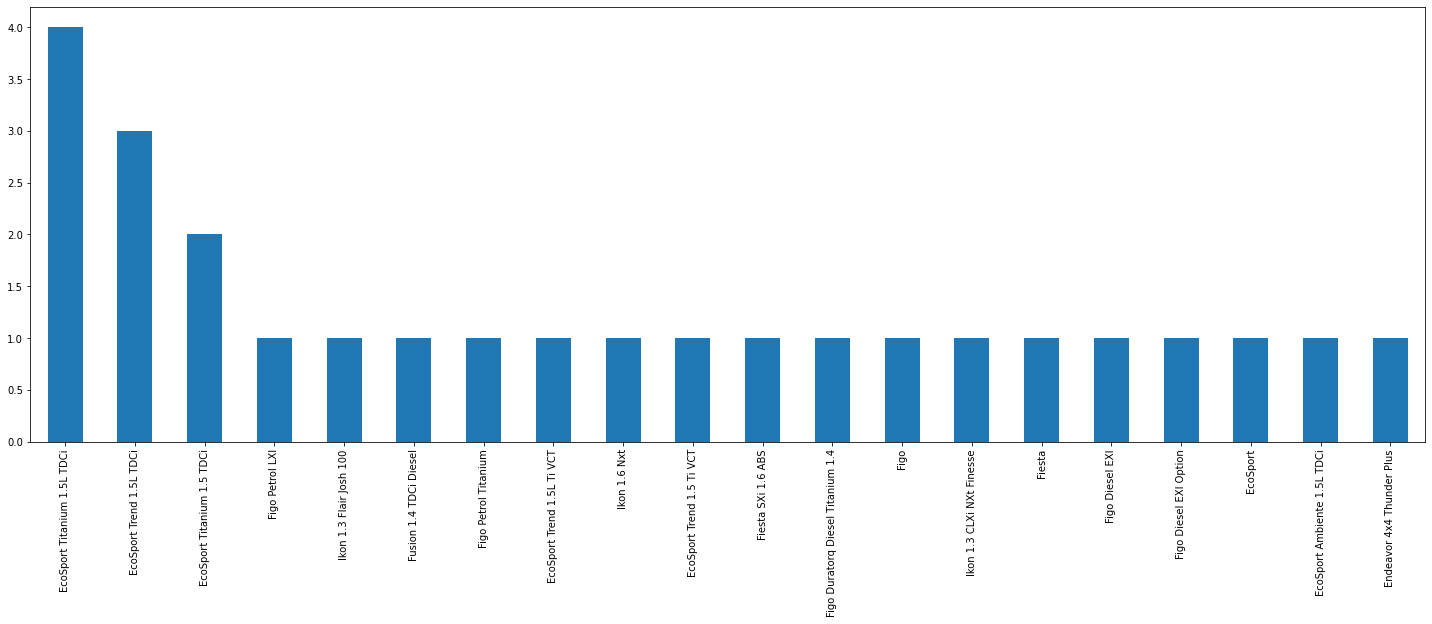

Before : 20
After : 6

EcoSport    13
Figo         6
Ikon         3
Fiesta       2
Fusion       1
Endeavor     1
Name: name, dtype: int64


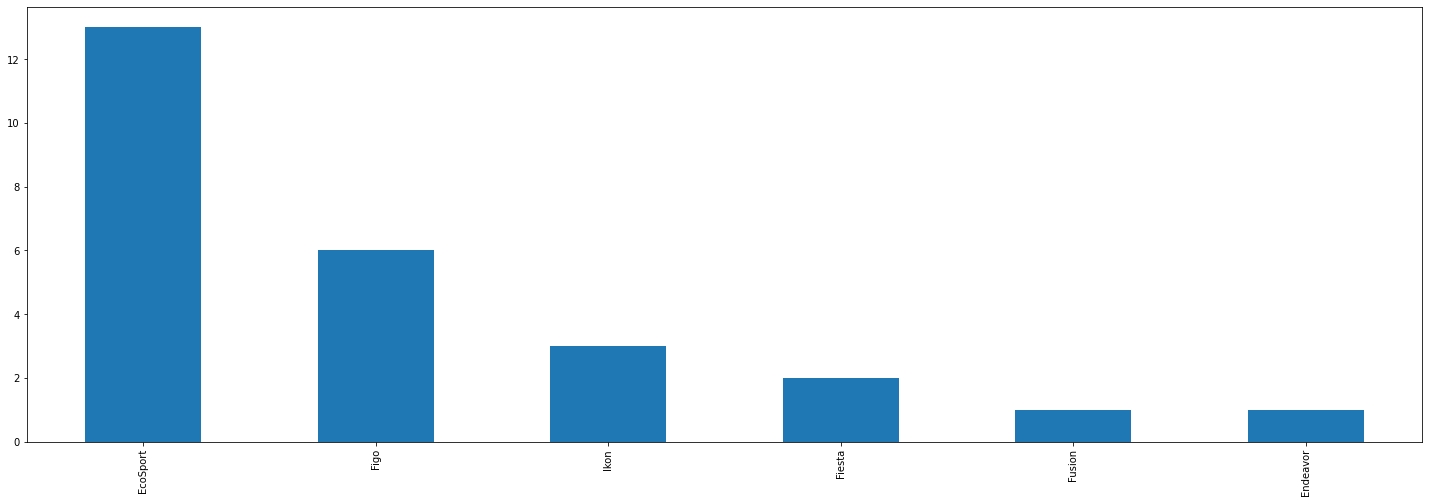

In [57]:
df_ford=brand_name('Ford')

# Working with Audi

A4 2.0 TDI 177bhp Premium               3
A8                                      1
Q7                                      1
A4 1.8 TFSI Multitronic Premium Plus    1
Q3 2.0 TDI quattro Premium              1
A6 2.0 TDI Premium                      1
Q5 2.0 TDI quattro Premium Plus         1
A3 Cabriolet 40 TFSI                    1
Name: name, dtype: int64


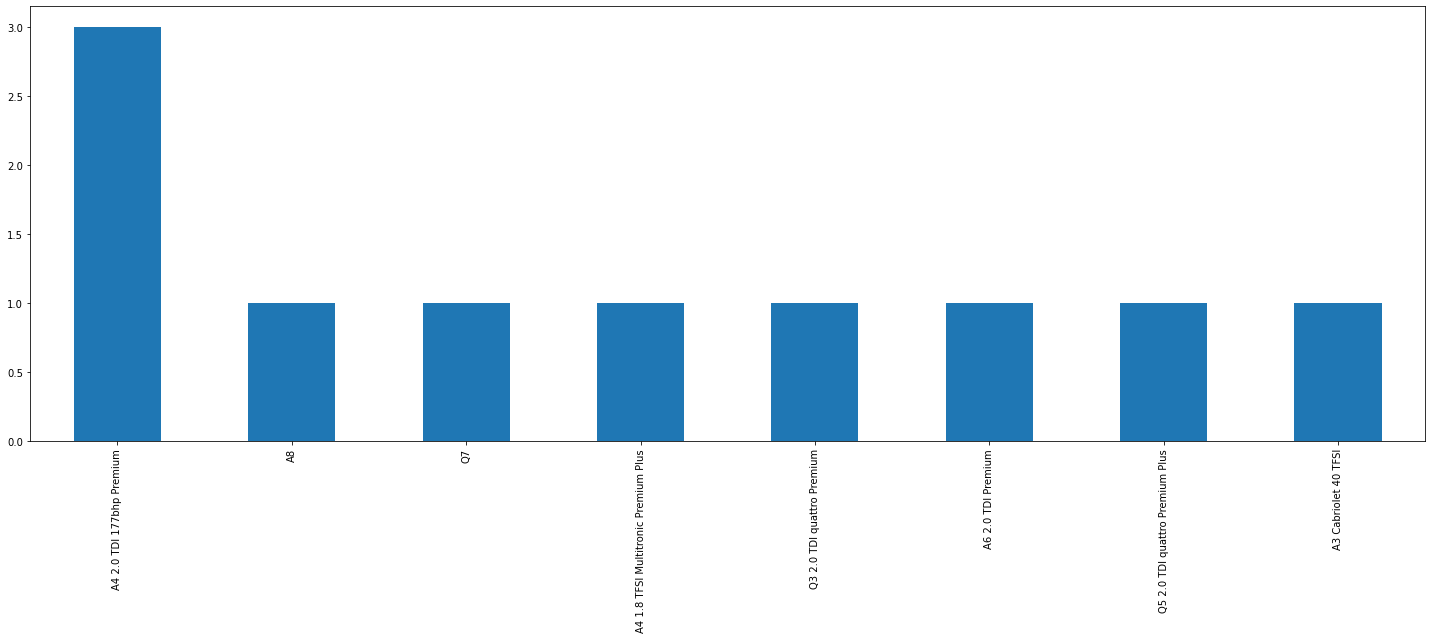

Before : 8
After : 7

A4    4
A8    1
Q7    1
Q3    1
A6    1
Q5    1
A3    1
Name: name, dtype: int64


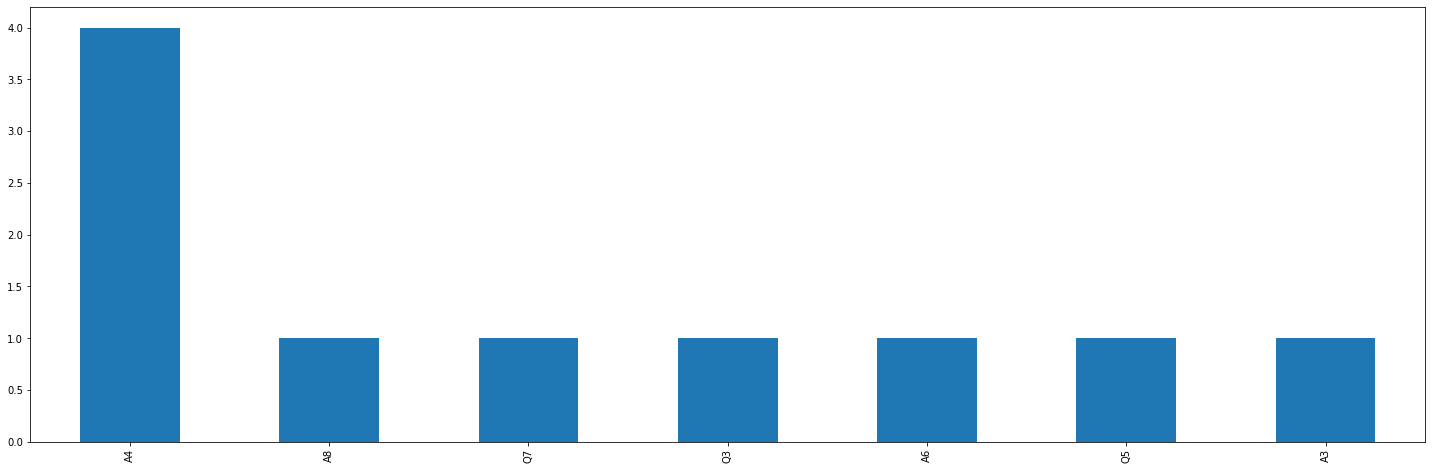

In [58]:
df_audi=brand_name('Audi')

# Working with Skoda

Laura                           2
Fabia Classic 1.2 MPI           1
Yeti Ambition 2.0 TDI CR 4x2    1
Fabia 1.2L Diesel Ambiente      1
Fabia 1.2L Diesel Elegance      1
Rapid Elegance 1.6 TDI CR MT    1
Superb 1.8 TFSI AT              1
Octavia Classic 1.9 TDI MT      1
Fabia                           1
Name: name, dtype: int64


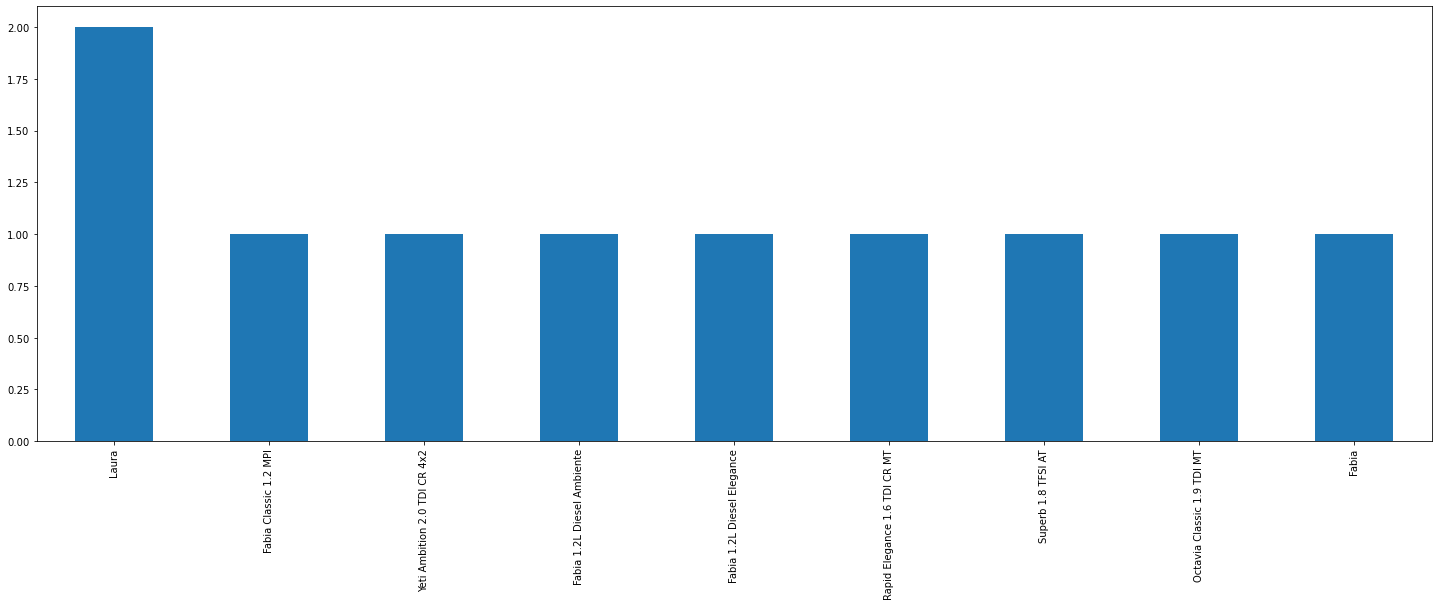

Before : 9
After : 6

Fabia      4
Laura      2
Yeti       1
Rapid      1
Superb     1
Octavia    1
Name: name, dtype: int64


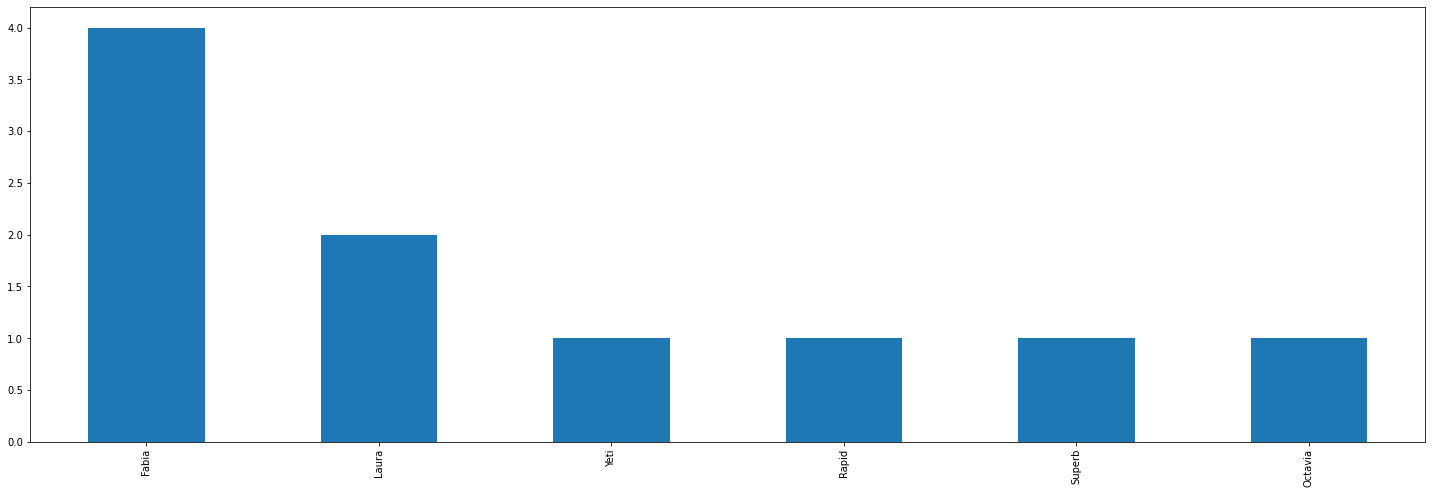

In [59]:
df_skoda=brand_name('Skoda')

# Working with BMW

3 Series 320i           1
7 Series 740Li Sedan    1
5 Series 520d Sedan     1
X1 xDrive20d xLine      1
5 Series 530i           1
3 Series 320d Sedan     1
X1 sDrive20d            1
X1                      1
Name: name, dtype: int64


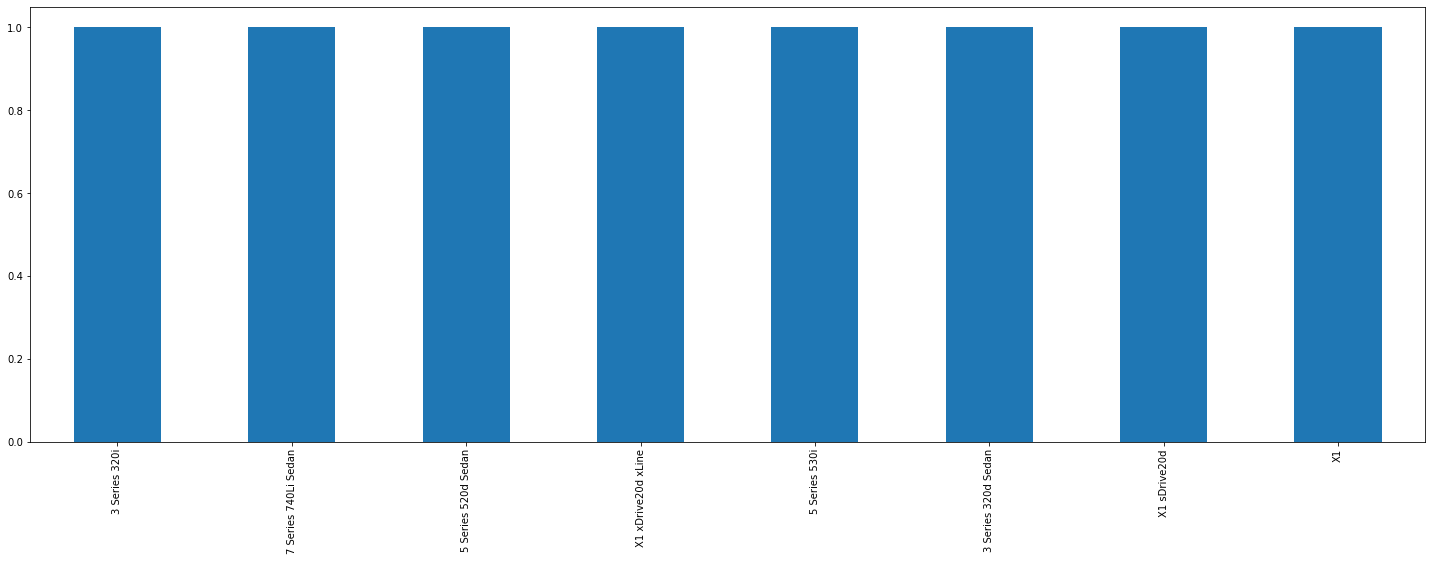

In [60]:
# BMW car names are sometimes more than one worded , so passing False as argument. 
df_bmw=brand_name('BMW',False)

In [61]:
samp=df_bmw['name']
series_3=samp[(samp.str.startswith('3'))].values
series_5=samp[(samp.str.startswith('5'))].values
x1=samp[(samp.str.startswith('X1'))].values
df_bmw['name']=df_bmw['name'].replace('7 Series 740Li Sedan','7 Series')
df_bmw['name']=df_bmw['name'].replace(series_3,'3 Series')
df_bmw['name']=df_bmw['name'].replace(series_5,'5 Series')
df_bmw['name']=df_bmw['name'].replace(x1,'X1')
print(df_bmw['name'].value_counts())

X1          3
3 Series    2
5 Series    2
7 Series    1
Name: name, dtype: int64


###  Final Bar plot to check the entries and its frequency of BMW cars

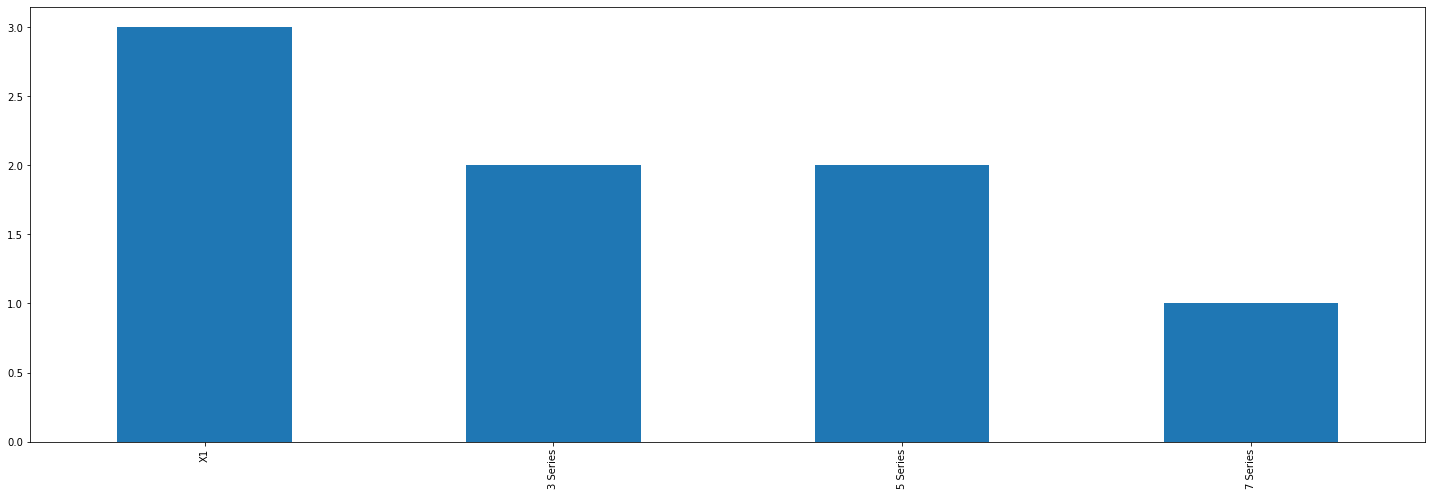

In [62]:
plt.figure(figsize=(25,8))
df_bmw['name'].value_counts().plot(kind="bar")
plt.show()

# Working with Datsun

Redi GO S      2
Redi GO T O    1
GO T O         1
Redi GO        1
Go Plus        1
Name: name, dtype: int64


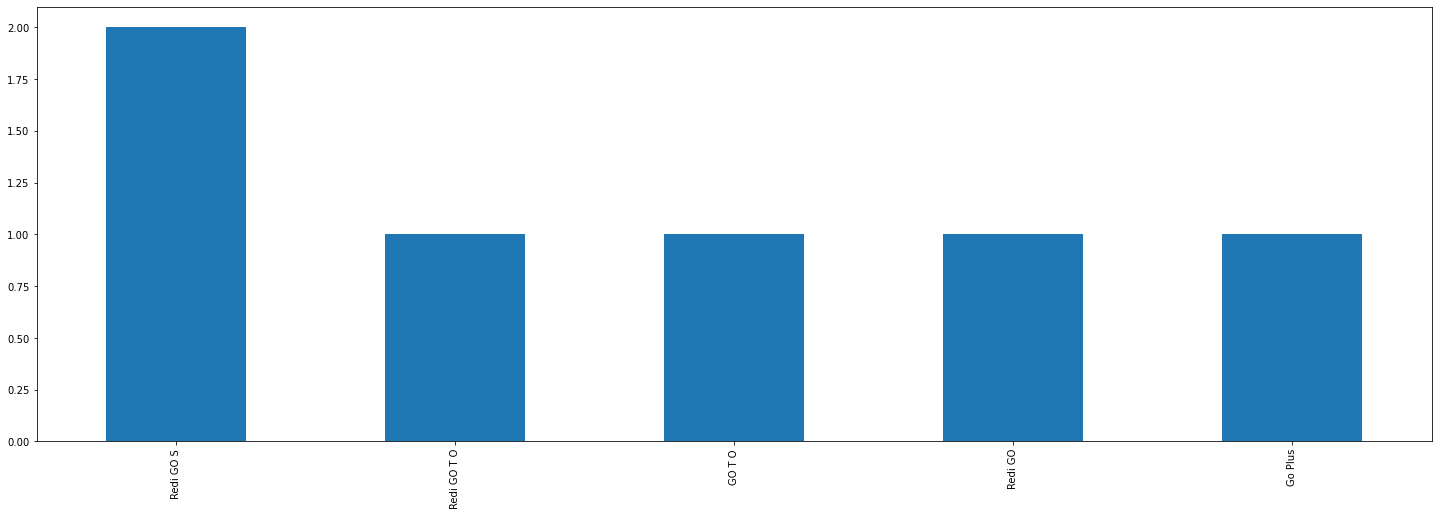

In [63]:
# Datsun car names are sometimes more than one worded , so passing False as argument. 

df_datsun=brand_name('Datsun',False)
Redigo=samp[(samp.str.startswith('Redi'))].values
Go_plus=samp[(samp.str.startswith('Go Plus'))].values
GO=samp[(samp.str.startswith('GO'))].values
df_datsun['name']=df_datsun['name'].replace(Redigo,'Redi GO')
df_datsun['name']=df_datsun['name'].replace(GO,'GO')
df_datsun['name']=df_datsun['name'].replace(Go_plus,'GO Plus')

### Final Bar plot to check the entries and its frequency of Datsun cars

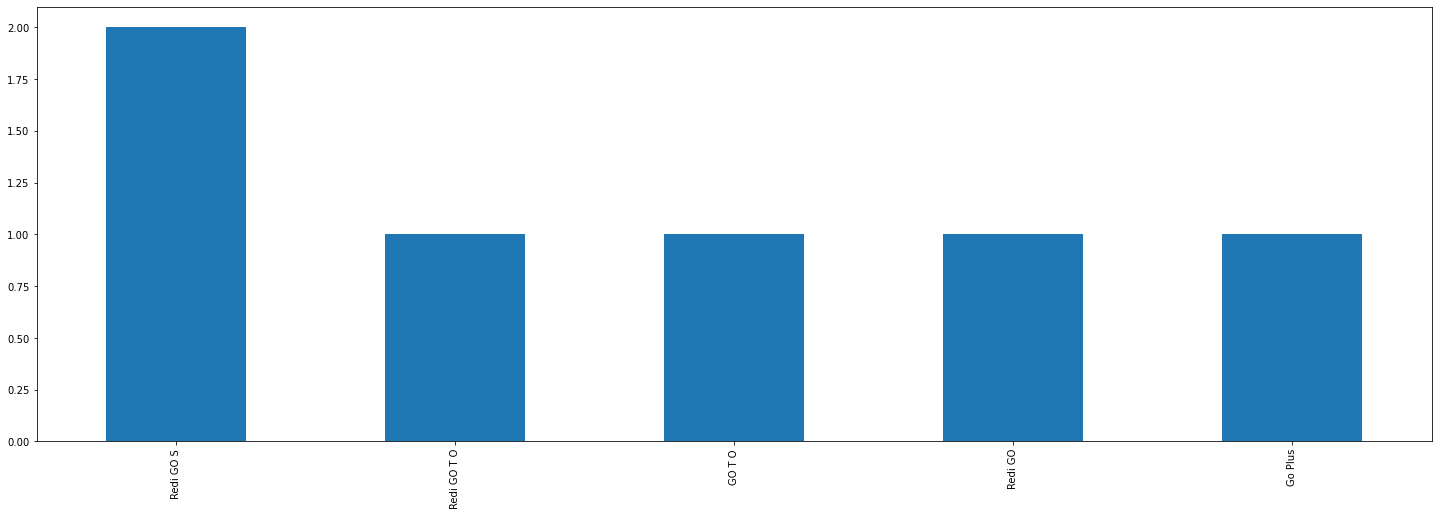

In [64]:
plt.figure(figsize=(25,8))
df_datsun['name'].value_counts().plot(kind="bar")
plt.show()

# Working with Nissan 

Micra XV                  1
Sunny                     1
Terrano XL D Plus         1
X Trail Select Variant    1
Sunny XL                  1
Micra XL                  1
Name: name, dtype: int64


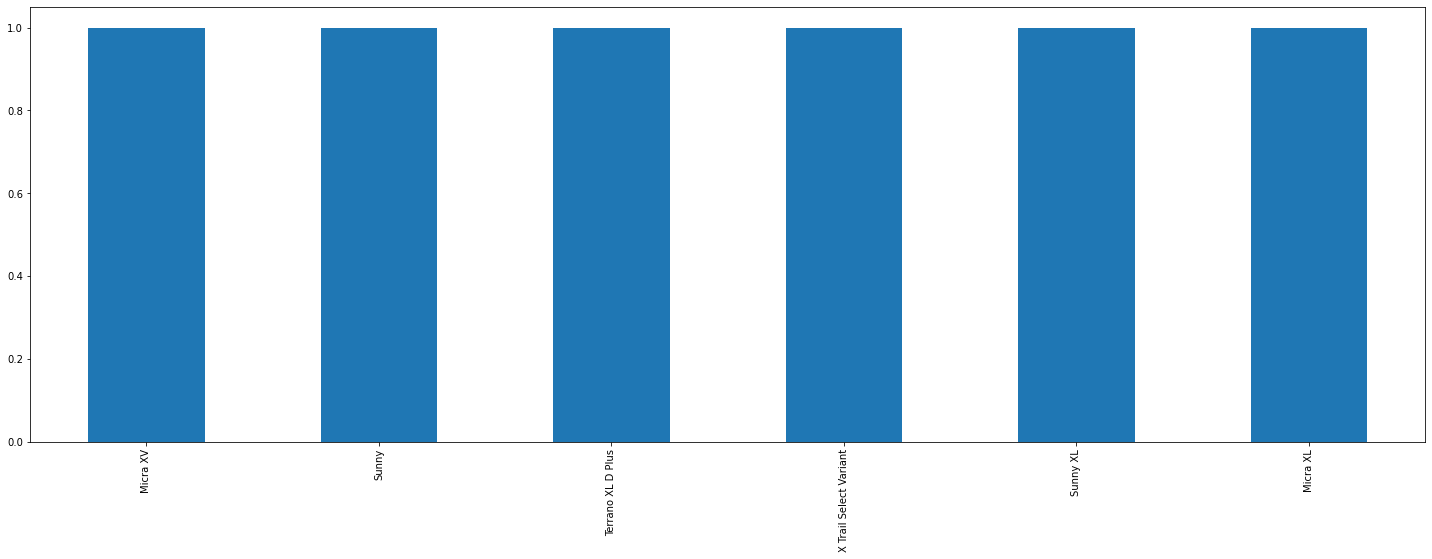

Before : 6
After : 4

Micra      2
Sunny      2
Terrano    1
X          1
Name: name, dtype: int64


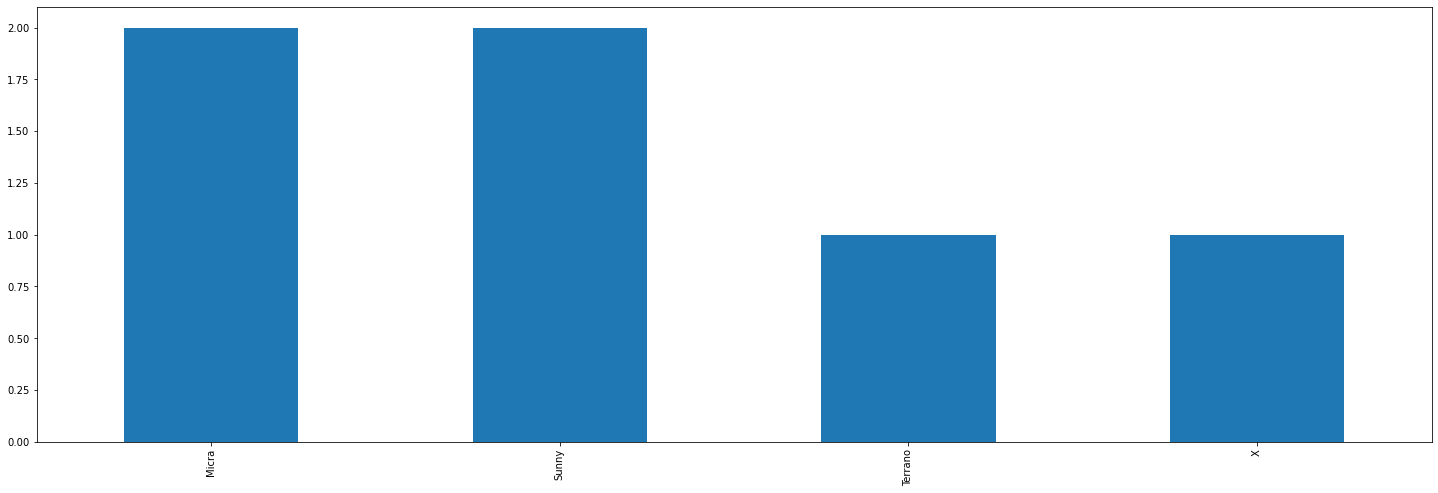

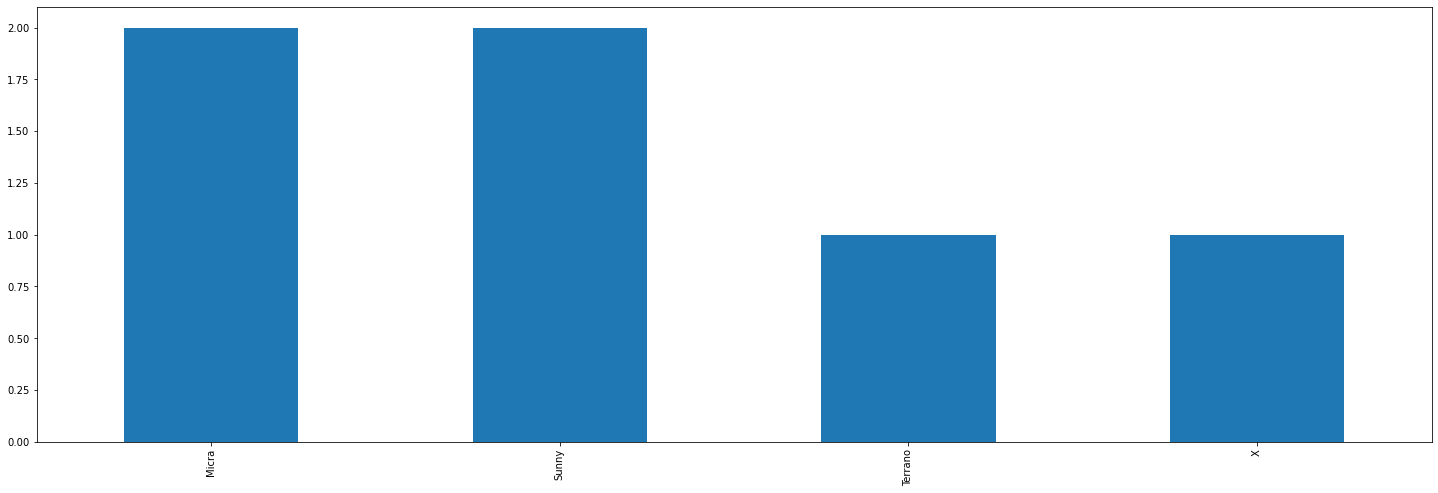

In [65]:
df_Nissan=brand_name('Nissan')
df.at[427,'name']='X Trail'
plt.figure(figsize=(25,8))
df_Nissan['name'].value_counts().plot(kind="bar")
plt.show()

# Working with Mitshubishi

Pajero Sport Limited Edition    3
Lancer 1.8 LXi                  1
Pajero Sport 2.5 AT             1
Name: name, dtype: int64


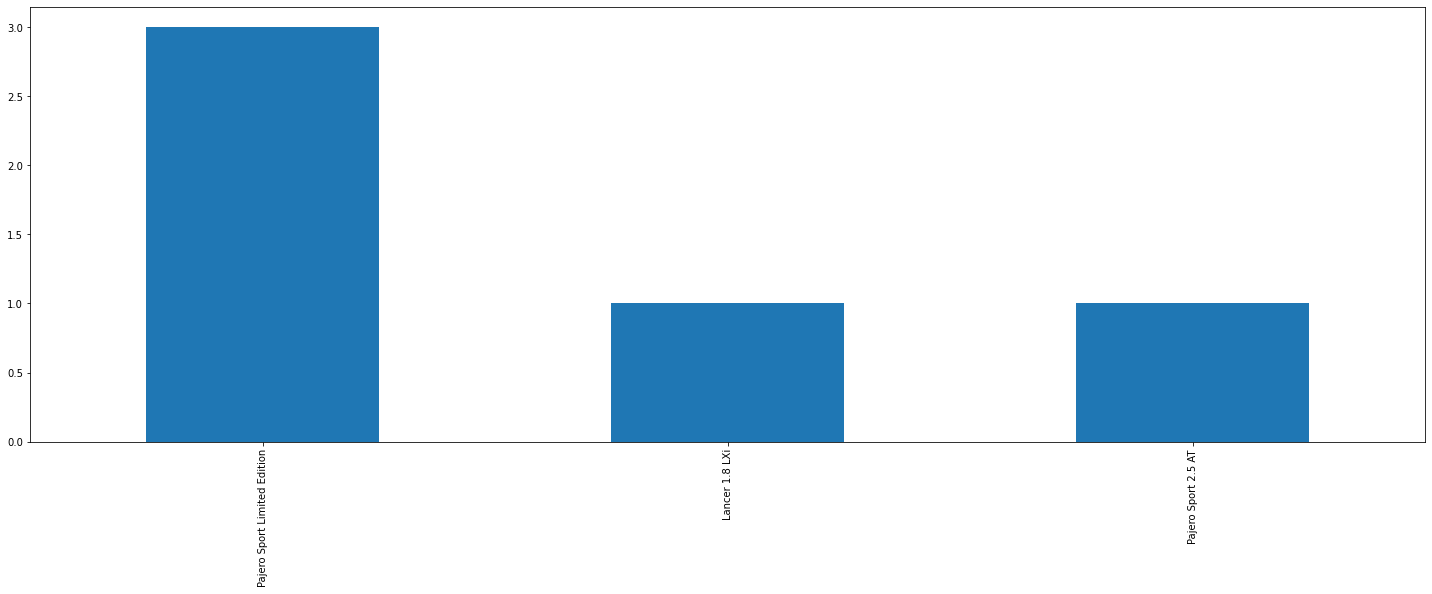

In [66]:
# Mitshubishi car names are sometimes more than one worded , so passing False as argument. 
df_mits=brand_name('Mitsubishi',False)
samp=df_mits['name']
Pajero_sp=samp[(samp.str.startswith('P'))].values
df_mits['name']=df_mits['name'].replace('Lancer 1.8 LXi','Lancer')
df_mits['name']=df_mits['name'].replace(Pajero_sp,'Pajero Sport')

###  Final Bar plot to check the entries and its frequency of Mitshubishi cars

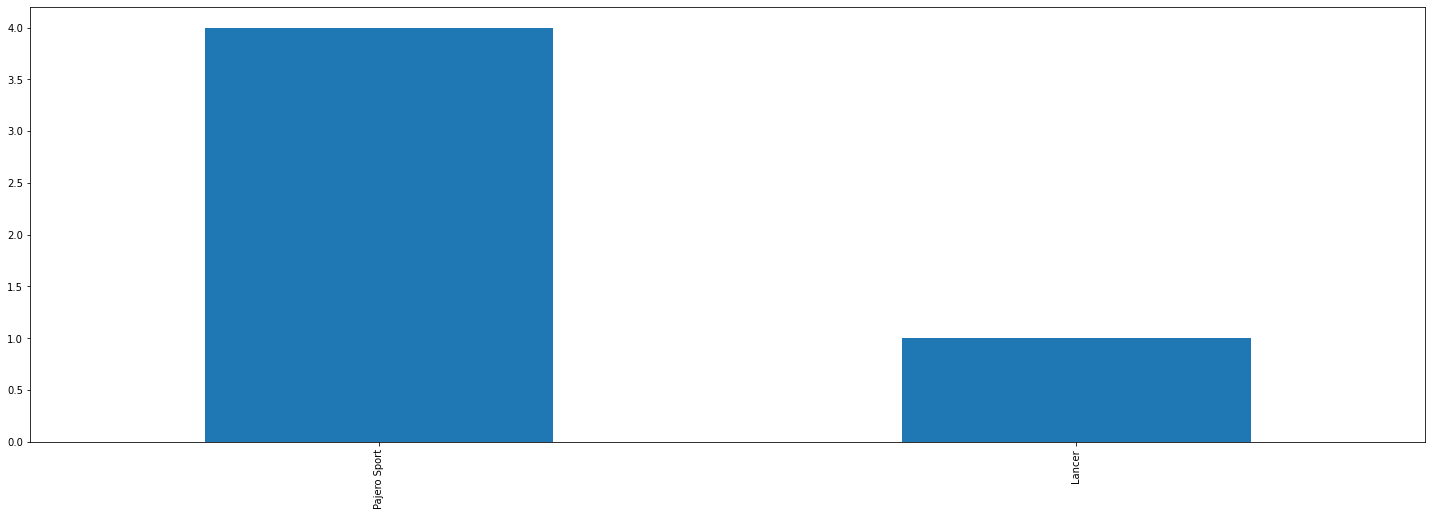

In [67]:
plt.figure(figsize=(25,8))
df_mits['name'].value_counts().plot(kind="bar")
plt.show()

# Working with Mercedes Benz

GLA Class 200 CDI Sport         1
B Class B180 Sports             1
C Class 200 CDI Classic         1
A Class A 180 Sport Petrol      1
C Class C 220 CDI Avantgarde    1
C Class 200 K MT                1
Name: name, dtype: int64


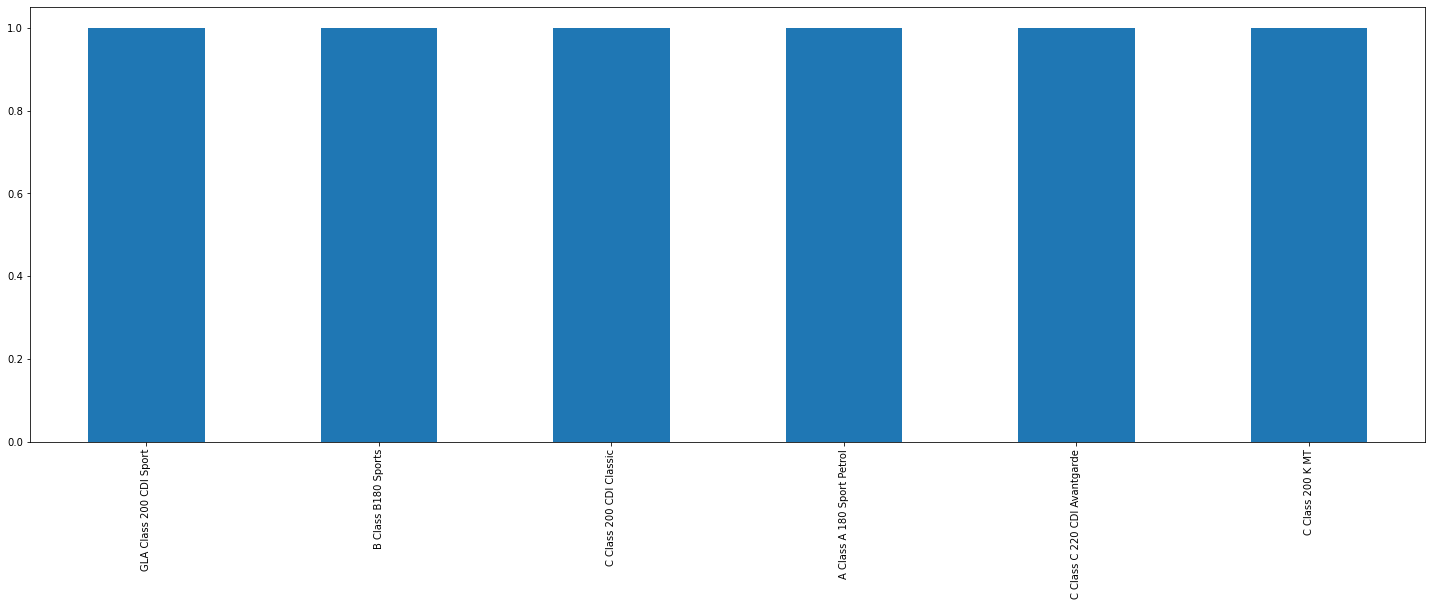

In [68]:
# Mercedes car names are sometimes more than one worded , so passing False as argument. 

df_merc=brand_name('Mercedes Benz',False)
samp=df_merc['name']
C_class=['C Class 200 CDI Classic','C Class C 220 CDI Avantgarde','C Class 200 K MT']
df_merc['name']=df_merc['name'].replace('A Class A 180 Sport Petrol','A Class')
df_merc['name']=df_merc['name'].replace('GLA Class 200 CDI Sport','GLA Class')         
df_merc['name']=df_merc['name'].replace('B Class B180 Sports','B Class')
df_merc['name']=df_merc['name'].replace(C_class,'C Class')

###  Final Bar plot to check the entries and its frequency of Mercedes cars

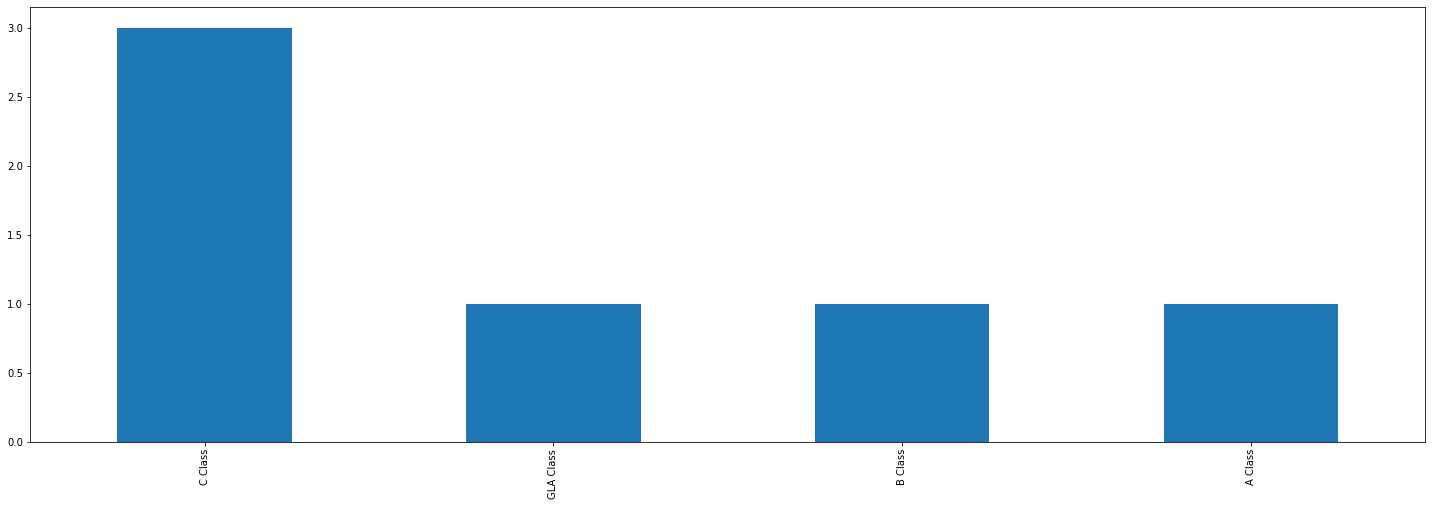

In [69]:
plt.figure(figsize=(25,8))
df_merc['name'].value_counts().plot(kind="bar")
plt.show()

# Working with the rest of the companies which does not need helper functions 

In [70]:
mini=['Mini Cooper S 1.6','Mini Cooper S 1.6','Mini Cooper S']
dfnew['name']=dfnew['name'].replace(mini,'Mini Cooper S')

Ambassador                          2
Ambassador Classic Mark 4 – Befo    1
Name: name, dtype: int64


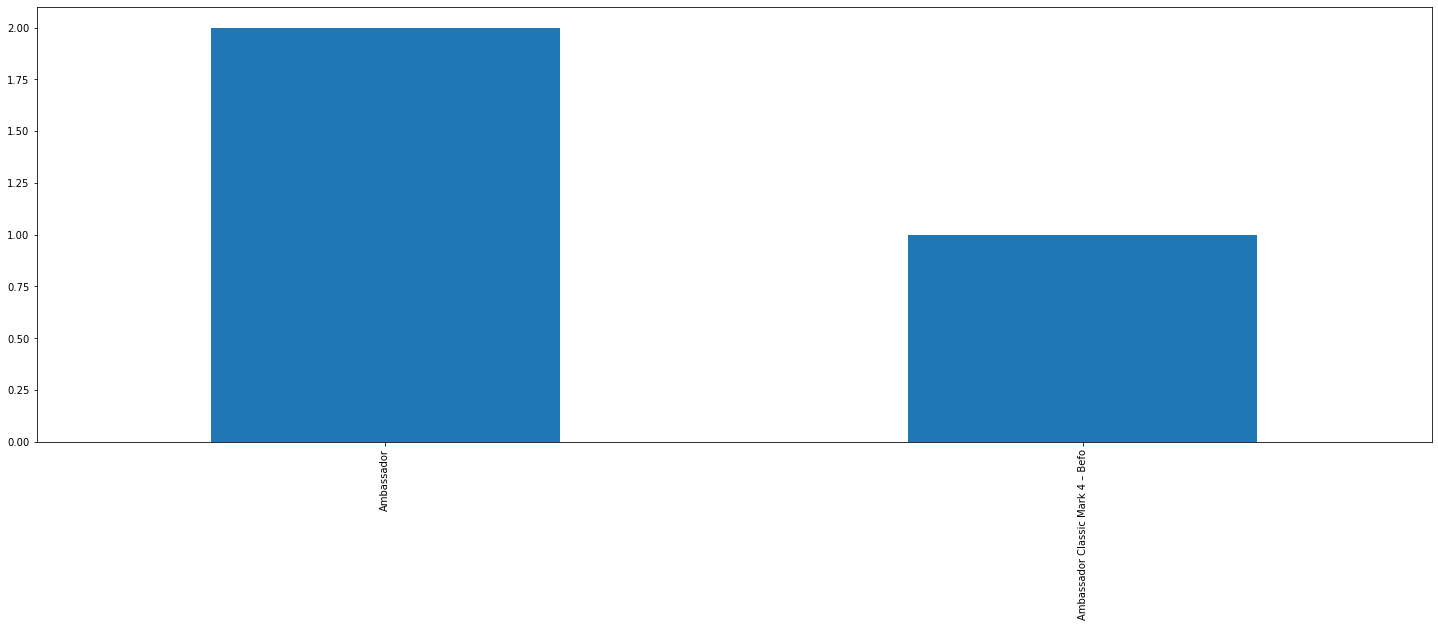

Before : 2
After : 1

Ambassador    3
Name: name, dtype: int64


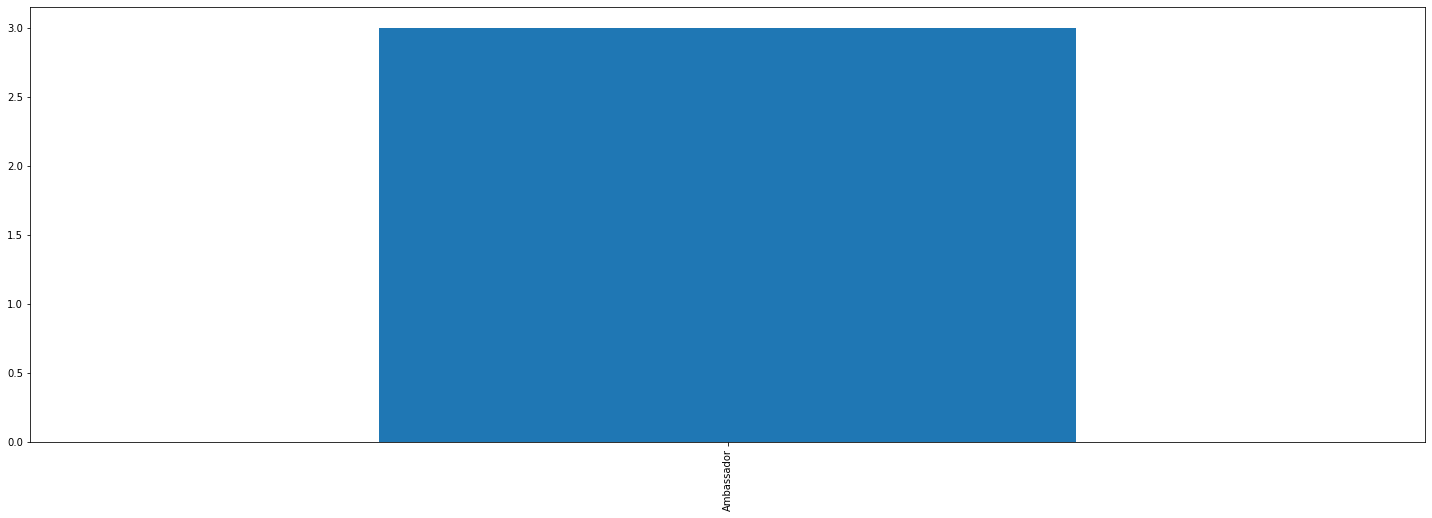

In [71]:
df_hind=brand_name('Hindustan Motors')

Punto Emotion 1.2                   1
Petra ELX 1.2 PS                    1
Linea Emotion 1.4 L T Jet Petrol    1
Name: name, dtype: int64


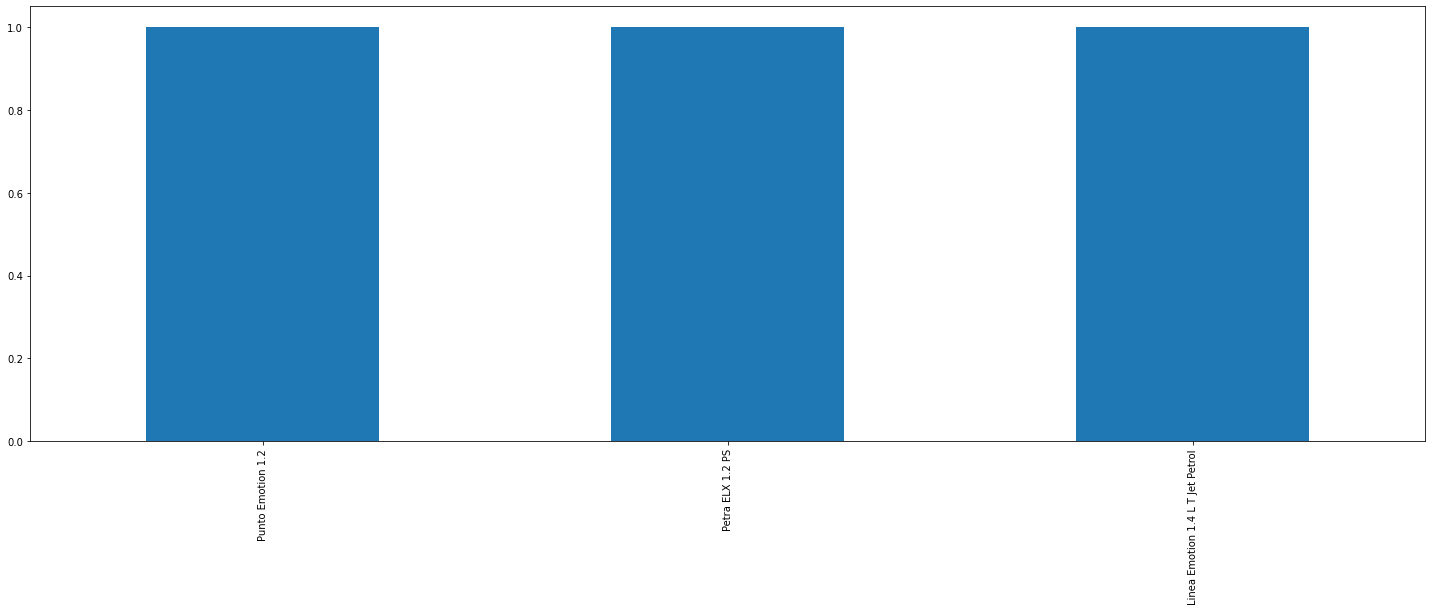

Before : 3
After : 3

Punto    1
Petra    1
Linea    1
Name: name, dtype: int64


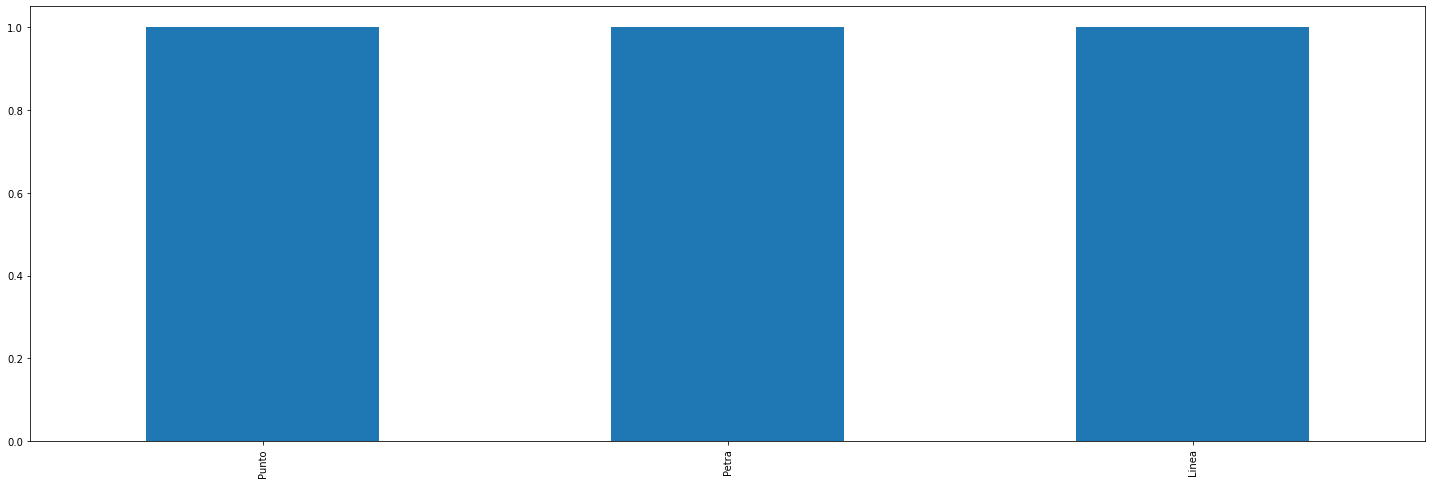

In [72]:
df_fiat=brand_name('Fiat')

In [73]:
force=['Force Motors Force One LX ABS 7 STR','Force Motors One SUV']
dfnew['name']=dfnew['name'].replace(force,'Force One')

In [74]:
dfnew['name']=dfnew['name'].replace('Jaguar XF 2.2 Diesel Luxury','XF')
dfnew['name']=dfnew['name'].replace('Jaguar XE XE Portfolio','XE')

Wrangler Unlimited 4x4 Diesel    1
Name: name, dtype: int64


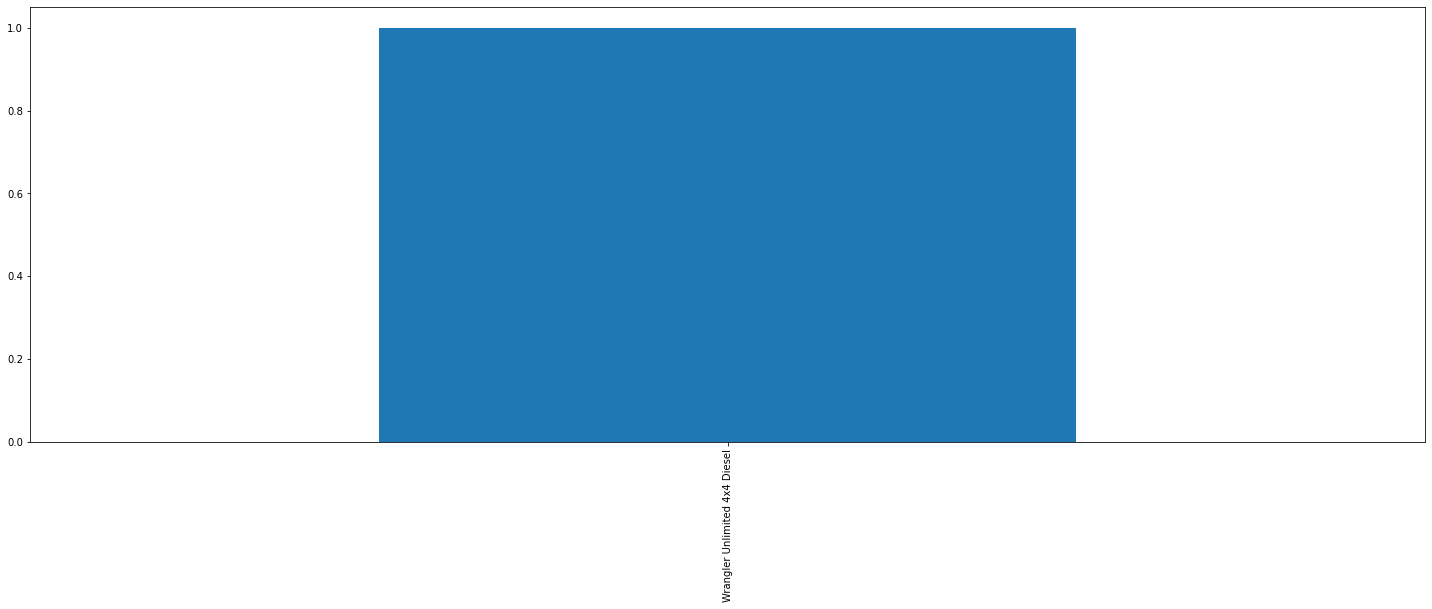

Before : 1
After : 1

Wrangler    1
Name: name, dtype: int64


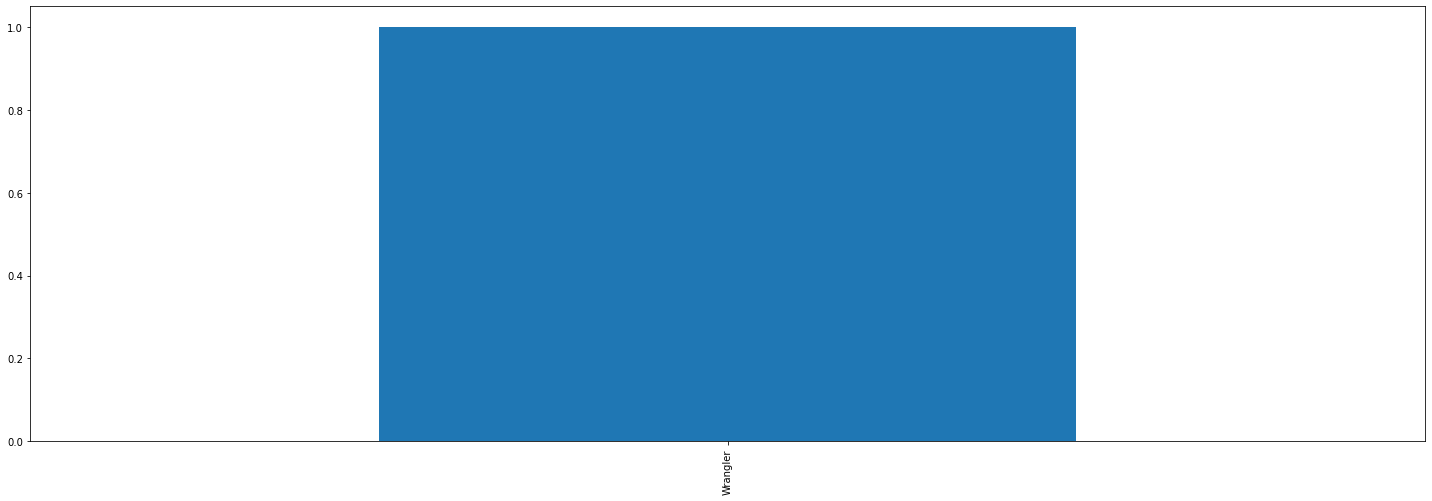

,name,company,year,Price,kms_driven,fuel_type
580,Wrangler,Jeep,2015,"9,50,000","3,528 kms",Diesel


In [75]:
df_Jeep=dfnew[df['company']=='Jeep']
df_Jeep=brand_name('Jeep')
df_Jeep

In [76]:
dfnew['name']=dfnew['name'].replace('Volvo S80 Summum D4','S80')

In [77]:
dfnew['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

In [78]:
modified_comps=[df_audi,df_bmw,df_ch,df_datsun,df_fiat,df_ford,
df_h,df_hind,df_honda,df_merc,df_Jeep,df_m,df_mits,
df_ms,df_Nissan,df_ren,df_vw,df_skoda,df_tata,df_toy]

## Finding unique cars and car count from all brands

In [79]:
for i in modified_comps:
    print(i['name'].nunique())
    print(i['name'].unique())
    print('-'*80)
    #print()

7
['A8' 'Q7' 'A4' 'Q3' 'A6' 'Q5' 'A3']
--------------------------------------------------------------------------------
4
['3 Series' '7 Series' '5 Series' 'X1']
--------------------------------------------------------------------------------
7
['Spark' 'Beat' 'Tavera Neo' 'Enjoy' 'Sail' 'Cruze' 'Tavera']
--------------------------------------------------------------------------------
5
['Redi GO S' 'Redi GO T O' 'GO T O' 'Redi GO' 'Go Plus']
--------------------------------------------------------------------------------
3
['Punto' 'Petra' 'Linea']
--------------------------------------------------------------------------------
6
['EcoSport' 'Figo' 'Fiesta' 'Ikon' 'Fusion' 'Endeavor']
--------------------------------------------------------------------------------
14
['Santro' 'Grand i10' 'Eon' 'Elite i20' 'i20' 'Verna' 'i10' 'Creta'
 'i20 Active' 'Accent' 'Elantra' 'Sonata Transform' 'Xcent' 'Getz']
--------------------------------------------------------------------------------
1
['

# Concatenating all the individual car dataframes to a single one

In [80]:
df_concatenated=pd.concat(modified_comps)
df_concatenated=df_concatenated.sort_index()
df_concatenated=df_concatenated.reset_index(drop=True)

In [81]:
df=df_concatenated.copy()

In [82]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Santro,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Jeep,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Grand i10,Hyundai,2014,"3,25,000","28,000 kms",Petrol
3,EcoSport,Ford,2014,"5,75,000","36,000 kms",Diesel
4,Figo,Ford,2012,"1,75,000","41,000 kms",Diesel


In [83]:
print('company:',df['company'].dtype)
print('year:',df['year'].dtype)
print('Price:',df['Price'].dtype)

company: object
year: object
Price: object


###  Changing data type of the price, year, kms_driven to numeric

In [84]:
df['Price']=df['Price'].str.replace(',','')
df['Price']=df['Price'].astype('int32')
df['year']=df['year'].astype('int32')

df['kms_driven']=df['kms_driven'].str.replace(',','')
df['kms_driven']=df['kms_driven'].str.replace(' kms','')
df['kms_driven']=df['kms_driven'].astype('int32')

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716 entries, 0 to 715
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        716 non-null    object
 1   company     716 non-null    object
 2   year        716 non-null    int32 
 3   Price       716 non-null    int32 
 4   kms_driven  716 non-null    int32 
 5   fuel_type   716 non-null    object
dtypes: int32(3), object(3)
memory usage: 25.3+ KB


In [86]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Santro,Hyundai,2007,80000,45000,Petrol
1,Jeep,Mahindra,2006,425000,40,Diesel
2,Grand i10,Hyundai,2014,325000,28000,Petrol
3,EcoSport,Ford,2014,575000,36000,Diesel
4,Figo,Ford,2012,175000,41000,Diesel


In [87]:
df[df['fuel_type']=='LPG']

,name,company,year,Price,kms_driven,fuel_type
369,Eeco,Maruti,2013,290000,70000,LPG
492,Omni,Maruti,2012,120000,160000,LPG


# As there are only 2 entries with LPG fuel type, they cannot be well understood by the regressive models , so dropping them

In [88]:
df.drop(index=[369,492],inplace=True)

In [89]:
df['fuel_type'].unique()

array(['Petrol', 'Diesel'], dtype=object)

# Storing the cleaned data into a new csv file for further analysis , modelling processes

In [90]:
#df.to_csv('Cleaned car dset.csv',index=False)

## Good to go for viz(EDA) and Data wrangling

In [91]:
num=[df['kms_driven'],df['Price'],df['year']]
cat=[df['name'],df['company']]

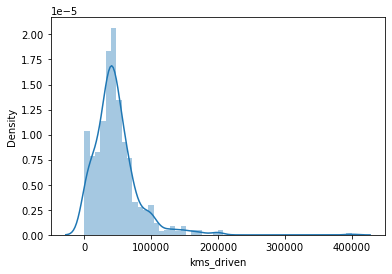

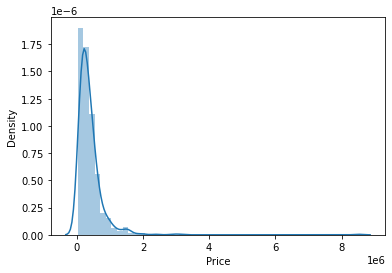

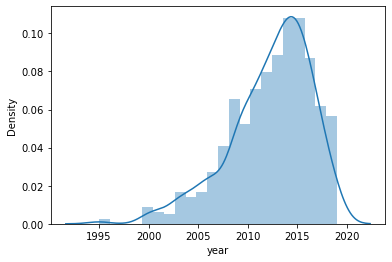

In [92]:
for i in num:
    sns.distplot(i,kde=True)
    plt.show()

## Box plots for all the numeric columns

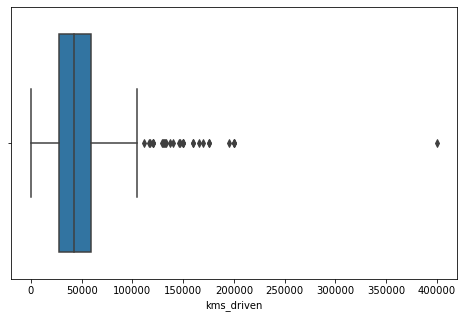

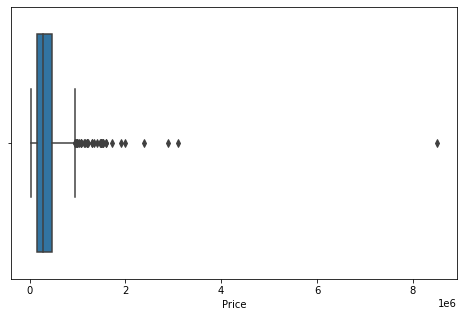

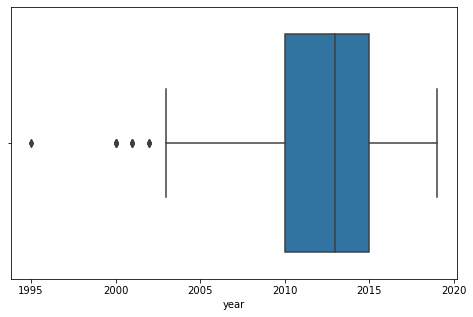

In [93]:
for i in num:
    plt.figure(figsize=(8,5))
    sns.boxplot(i)
    plt.show()

## Bar plot for visualizing the number of companies and their frequency

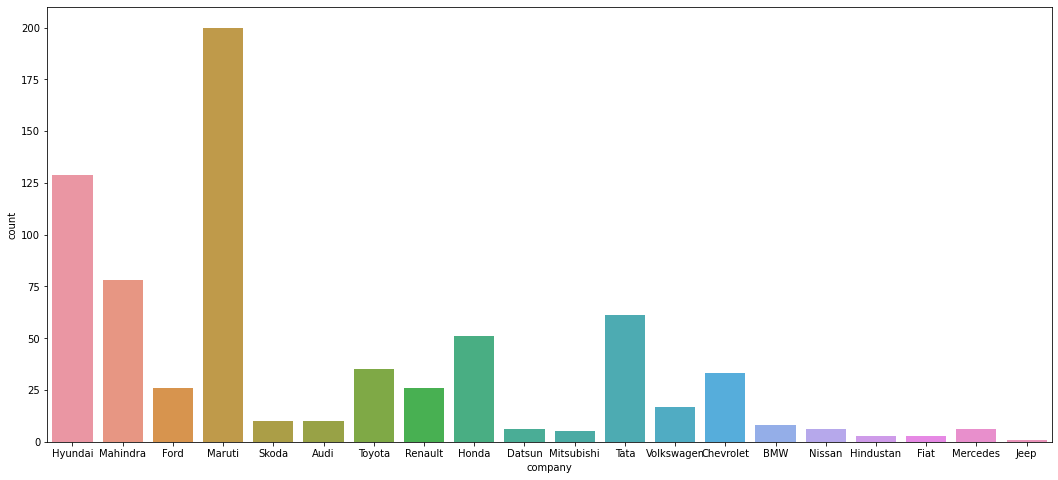

In [94]:
plt.figure(figsize=(18,8))
sns.countplot('company',data=df)
plt.show()

In [95]:
df.corr()

,year,Price,kms_driven
year,1.000000,0.296756,-0.251226
Price,0.296756,1.000000,-0.103673
kms_driven,-0.251226,-0.103673,1.000000


In [96]:
df['Price'].describe()

count    7.140000e+02
mean     3.866542e+05
std      4.523693e+05
min      3.000000e+04
25%      1.650000e+05
50%      2.850000e+05
75%      4.787500e+05
max      8.500003e+06
Name: Price, dtype: float64

### There's an outlier with too high price,dropping it off

In [97]:
df[df['Price']>=2500000]
df=df.drop(index=442)

In [98]:
df['Price'].describe()

count    7.130000e+02
mean     3.752750e+05
std      3.351759e+05
min      3.000000e+04
25%      1.650000e+05
50%      2.850000e+05
75%      4.750000e+05
max      3.100000e+06
Name: Price, dtype: float64

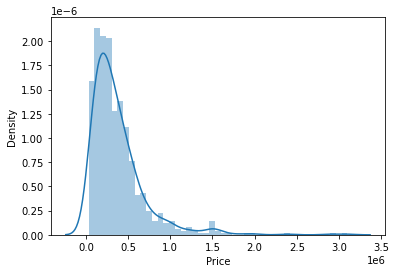

In [99]:
sns.distplot(df['Price'],kde=True)
plt.show()

In [100]:
df

,name,company,year,Price,kms_driven,fuel_type
0,Santro,Hyundai,2007,80000,45000,Petrol
1,Jeep,Mahindra,2006,425000,40,Diesel
2,Grand i10,Hyundai,2014,325000,28000,Petrol
3,EcoSport,Ford,2014,575000,36000,Diesel
4,Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
711,Ritz,Maruti,2011,270000,50000,Petrol
712,Indica v2,Tata,2009,110000,30000,Diesel
713,Corolla Altis,Toyota,2009,300000,132000,Petrol
714,Zest,Tata,2018,260000,27000,Diesel


## Baseline model trial with linear regression

In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

x=df.drop(columns='Price')
y=df['Price']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)

#Creating an OneHotEncoder object to contain all the possible categories
ohe=OneHotEncoder()
ohe.fit(df[['name','company','fuel_type']])

#Creating a column transformer to transform categorical columns
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                    remainder='passthrough')

lr=LinearRegression()
#Making a pipeline
pipe=make_pipeline(column_trans,lr)
#Fitting the model
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['3 Series', '5 Series', '7 Series', 'A Class', 'A Star', 'A3',
       'A4', 'A6', 'A8', 'Accent', 'Accord', 'Alto', 'Alto 800',
       'Alto K10', 'Amaze', 'Ambassador', 'Aria', 'B Class', 'Baleno',
       'Beat', 'Bolero', 'Bolt', 'Brio', 'C Class', 'Celerio',...
       'Yeti', 'Zen', 'Zen Estilo', 'Zest', 'i10', 'i20', 'i20 Active'],
      dtype=object),
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Ford', 'Hindustan',
       'Honda', 'Hyundai', 'Jeep', 'Mahindra', 'Maruti', 'Mercedes',
       'Mitsubishi', 'Nissan', 'Renault', 'Skoda', 'Tata', 'Toyota',
       'Volkswagen'], dtype=object),
                                                                    

In [102]:
df=pd.read_csv("Cleaned car dset.csv")

In [103]:
df

,name,company,year,Price,kms_driven,fuel_type
0,Santro,Hyundai,2007,80000,45000,Petrol
1,Jeep,Mahindra,2006,425000,40,Diesel
2,Grand i10,Hyundai,2014,325000,28000,Petrol
3,EcoSport,Ford,2014,575000,36000,Diesel
4,Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
710,Ritz,Maruti,2011,270000,50000,Petrol
711,Indica v2,Tata,2009,110000,30000,Diesel
712,Corolla Altis,Toyota,2009,300000,132000,Petrol
713,Zest,Tata,2018,260000,27000,Diesel


# Finding the model with high accuracy at different folds of data

In [104]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [105]:
models = [LinearRegression(),Ridge(),Lasso(),AdaBoostRegressor(),BaggingRegressor(),
          DecisionTreeRegressor(),RandomForestRegressor(),GradientBoostingRegressor(),SVR()]


In [106]:
def results(model_name):

    # Combine the transformer and model into a pipeline
    pipeline = Pipeline([('column_transformer', cat_transformer),
                         (str(i), i)])

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=42)

    # Fit the pipeline to the training data
    pipeline.fit(X_train, y_train)

    #Predict on the testing data
    y_pred = pipeline.predict(X_test)
    train_pred=pipeline.predict(X_train)
    # Evaluate the model
    from sklearn.metrics import r2_score
    print('Train acc',r2_score(y_train,train_pred))
    print('Test acc',r2_score(y_test, y_pred))
    cvscores = cross_val_score(pipeline, x, y, cv=10)
    print('Cross val score',cvscores.mean()*100)
    print('-'*50)

In [107]:
x=df.drop('Price', axis=1)
y=df['Price']
categorical_cols = ['name', 'company', 'fuel_type']

cat_transformer = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'), categorical_cols)],
    remainder='passthrough')


for i in models:
    print()
    print(i)
    results(i)
    print('-'*50)


LinearRegression()
Train acc 0.9075927403155885
Test acc 0.7158709736096627
Cross val score 60.011214682302274
--------------------------------------------------
--------------------------------------------------

Ridge()
Train acc 0.021905586953401168
Test acc 0.012546815118650856
Cross val score -1.2559798707804803
--------------------------------------------------
--------------------------------------------------

Lasso()
Train acc 0.9076141649837483
Test acc 0.6227202119607455
Cross val score 55.77440467570231
--------------------------------------------------
--------------------------------------------------

AdaBoostRegressor()
Train acc 0.4350941420711162
Test acc 0.1756877798675941
Cross val score -18.271520876718863
--------------------------------------------------
--------------------------------------------------

BaggingRegressor()
Train acc 0.9177107043185251
Test acc 0.7421178092576022
Cross val score 50.12692260719657
-------------------------------------------------

# From the above results we can conclude that Linear regression model is the best model thats able to perform consistently not only in train and test but also in 10 folds to cross validated data ,SO choosing it as our final model

## Final model

In [108]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [109]:
x=df.drop('Price', axis=1)
y=df['Price']
categorical_cols = ['name', 'company', 'fuel_type']

cat_transformer = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'), categorical_cols)],
    remainder='passthrough')

#Define the linear regression model
linear_regression = LinearRegression()

# Combine the transformer and model into a pipeline
pipeline = Pipeline([('column_transformer', cat_transformer),
                     ('linear_regression', linear_regression)])


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=42)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

#Predict on the testing data
y_pred = pipeline.predict(X_test)
train_pred=pipeline.predict(X_train)
# Evaluate the model
from sklearn.metrics import r2_score
print('Train acc',r2_score(y_train,train_pred))
print('Test acc',r2_score(y_test, y_pred))
cvscores = cross_val_score(pipeline, x, y, cv=10)
print('Cross val score',cvscores.mean()*100)
print('-'*50)

Train acc 0.9075927403155885
Test acc 0.7158709736096627
Cross val score 60.011214682302274
--------------------------------------------------


### Testing

In [110]:
pipeline.predict(pd.DataFrame(columns=['name','company','year','kms_driven','fuel_type'],
                              data=np.array(['Fortuner','Toyota',2015,4100,'Diesel']).reshape(1,5)))[0]

1289929.78997574

# Dumping the model into a pickle file

In [111]:
#import pickle

In [112]:
#pickle.dump(pipeline,open('Price_predictor2.0.pkl','wb'))